In [1]:
import torch
import data
import tqdm
import models
import numpy as np
from torchvision.transforms import v2
from PIL import Image
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
EPOCHS = 500
BATCH_SIZE = 10
LR = 5e-7

In [3]:
def transform(x):
    x = v2.RandomAffine(degrees=(-180,180),scale=(0.8,1.2))(x)
    return x

def show_random_image(dataset, model, length):
    i = np.random.randint(low=0,high=length)
    LR, trueHR = dataset[i]
    t1 = torch.tensor(LR.view(1,1,64,64))
    t2 = model(t1.float().to(device)).cpu().detach()
    image1 = Image.fromarray(t1.numpy()[0][0]*255)
    image2 = Image.fromarray(t2.numpy()[0][0]*255)
    image3 = Image.fromarray(trueHR.numpy()[0]*255)
    return image1, image2, image3

In [4]:
dataset = data.LensingDataset('../dataset_2/','sparse')
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [0.9, 0.1])
train_dataloader = torch.utils.data.DataLoader(train_dataset,shuffle=True,batch_size=BATCH_SIZE,num_workers=15)
val_dataloader = torch.utils.data.DataLoader(val_dataset,shuffle=True,batch_size=BATCH_SIZE,num_workers=15)

In [5]:
model = models.Resnet_SISR(residual_depth=10, 
                           in_channels=1, 
                           maginfication=2, 
                           num_magnifications=1, 
                           latent_channel_count=64).to(device)

loss_fn = torch.nn.MSELoss()
opt = torch.optim.Adam(params=model.parameters(),lr=LR)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt,'min',patience=2,factor=0.1)

In [6]:
history = {'val_loss':[], 'loss':[]}
best_val_loss = np.inf
best_weights = None
for epoch in range(EPOCHS):
    losses = []
    model.train()
    for i,(x,y) in enumerate(tqdm.tqdm(train_dataloader, desc=f"Training epoch {epoch+1}")):
        (x, y) = (x.float().to(device), y.float().to(device))
        x = model(x)
        loss = loss_fn(x,y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        losses.append(float(loss))
    print(f"Training at epoch {epoch+1}/{EPOCHS}: {np.mean(losses)} at LR={opt.param_groups[0]['lr']}")
    history['loss'].append(np.mean(losses))
    train_loss = np.mean(losses)
    model.eval()
    losses = []
    for i,(x,y) in enumerate(tqdm.tqdm(val_dataloader, desc=f"Validation epoch {epoch}")):
        (x, y) = (x.float().to(device), y.to(device))
        x = model(x)
        val_loss = loss_fn(x,y)
        losses.append(float(val_loss))
    if best_val_loss > np.mean(losses):
        best_val_loss = np.mean(losses)
        best_weights = model.state_dict()
    history['val_loss'].append(np.mean(losses))
    print(f"Validation at epoch {epoch+1}/{EPOCHS}: {np.mean(losses)} at LR={opt.param_groups[0]['lr']}")
    # images.append((show_random_image(train_dataset, model, 900)))
    # scheduler.step(train_loss)

Training epoch 1: 100%|██████████| 27/27 [00:06<00:00,  4.45it/s]


Training at epoch 1/500: 0.017503757098758663 at LR=5e-07


Validation epoch 0: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


Validation at epoch 1/500: 0.006901111143330733 at LR=5e-07


Training epoch 2: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 2/500: 0.012419939834486556 at LR=5e-07


Validation epoch 1: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]


Validation at epoch 2/500: 0.004681771931548913 at LR=5e-07


Training epoch 3: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 3/500: 0.009815683415918439 at LR=5e-07


Validation epoch 2: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]


Validation at epoch 3/500: 0.006057364555696647 at LR=5e-07


Training epoch 4: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 4/500: 0.008356061729568022 at LR=5e-07


Validation epoch 3: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]


Validation at epoch 4/500: 0.006926659494638443 at LR=5e-07


Training epoch 5: 100%|██████████| 27/27 [00:03<00:00,  7.02it/s]


Training at epoch 5/500: 0.007388877027012684 at LR=5e-07


Validation epoch 4: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]


Validation at epoch 5/500: 0.006084553586939971 at LR=5e-07


Training epoch 6: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]


Training at epoch 6/500: 0.006635645628665332 at LR=5e-07


Validation epoch 5: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 6/500: 0.005733335701127847 at LR=5e-07


Training epoch 7: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 7/500: 0.006088645490645258 at LR=5e-07


Validation epoch 6: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 7/500: 0.0054029628324011965 at LR=5e-07


Training epoch 8: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 8/500: 0.005656149755749438 at LR=5e-07


Validation epoch 7: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]


Validation at epoch 8/500: 0.004863272265841563 at LR=5e-07


Training epoch 9: 100%|██████████| 27/27 [00:03<00:00,  6.99it/s]


Training at epoch 9/500: 0.00528610162264495 at LR=5e-07


Validation epoch 8: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 9/500: 0.004582157824188471 at LR=5e-07


Training epoch 10: 100%|██████████| 27/27 [00:03<00:00,  6.98it/s]


Training at epoch 10/500: 0.00497670418203429 at LR=5e-07


Validation epoch 9: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]


Validation at epoch 10/500: 0.004139154062916835 at LR=5e-07


Training epoch 11: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]


Training at epoch 11/500: 0.004673792911624467 at LR=5e-07


Validation epoch 10: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 11/500: 0.004006752356265982 at LR=5e-07


Training epoch 12: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 12/500: 0.004459436077417599 at LR=5e-07


Validation epoch 11: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


Validation at epoch 12/500: 0.003703107281277577 at LR=5e-07


Training epoch 13: 100%|██████████| 27/27 [00:03<00:00,  6.95it/s]


Training at epoch 13/500: 0.0042580139426583495 at LR=5e-07


Validation epoch 12: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 13/500: 0.0035737158420185247 at LR=5e-07


Training epoch 14: 100%|██████████| 27/27 [00:03<00:00,  6.99it/s]


Training at epoch 14/500: 0.004106332953260453 at LR=5e-07


Validation epoch 13: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 14/500: 0.0033597725753982863 at LR=5e-07


Training epoch 15: 100%|██████████| 27/27 [00:03<00:00,  6.98it/s]


Training at epoch 15/500: 0.003954096654154084 at LR=5e-07


Validation epoch 14: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


Validation at epoch 15/500: 0.0032235278437534967 at LR=5e-07


Training epoch 16: 100%|██████████| 27/27 [00:03<00:00,  6.97it/s]


Training at epoch 16/500: 0.0038144065636313623 at LR=5e-07


Validation epoch 15: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 16/500: 0.0031619435952355466 at LR=5e-07


Training epoch 17: 100%|██████████| 27/27 [00:03<00:00,  6.96it/s]


Training at epoch 17/500: 0.0037115411143060083 at LR=5e-07


Validation epoch 16: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 17/500: 0.0030403923398504653 at LR=5e-07


Training epoch 18: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 18/500: 0.0035945725394412875 at LR=5e-07


Validation epoch 17: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 18/500: 0.0029727361785868802 at LR=5e-07


Training epoch 19: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 19/500: 0.0034919818777039095 at LR=5e-07


Validation epoch 18: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 19/500: 0.0028647377621382475 at LR=5e-07


Training epoch 20: 100%|██████████| 27/27 [00:03<00:00,  6.96it/s]


Training at epoch 20/500: 0.0034146101852120074 at LR=5e-07


Validation epoch 19: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


Validation at epoch 20/500: 0.0027685636499275765 at LR=5e-07


Training epoch 21: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 21/500: 0.003339187418869524 at LR=5e-07


Validation epoch 20: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]


Validation at epoch 21/500: 0.002699223735059301 at LR=5e-07


Training epoch 22: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]


Training at epoch 22/500: 0.0032700870048116754 at LR=5e-07


Validation epoch 21: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]


Validation at epoch 22/500: 0.002648544575398167 at LR=5e-07


Training epoch 23: 100%|██████████| 27/27 [00:03<00:00,  6.97it/s]


Training at epoch 23/500: 0.0032258265160231125 at LR=5e-07


Validation epoch 22: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 23/500: 0.002597077051177621 at LR=5e-07


Training epoch 24: 100%|██████████| 27/27 [00:03<00:00,  6.96it/s]


Training at epoch 24/500: 0.003174272715114057 at LR=5e-07


Validation epoch 23: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 24/500: 0.0025500907795503736 at LR=5e-07


Training epoch 25: 100%|██████████| 27/27 [00:03<00:00,  6.96it/s]


Training at epoch 25/500: 0.0031330631485346843 at LR=5e-07


Validation epoch 24: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


Validation at epoch 25/500: 0.00247092063849171 at LR=5e-07


Training epoch 26: 100%|██████████| 27/27 [00:03<00:00,  6.99it/s]


Training at epoch 26/500: 0.0030931161578606676 at LR=5e-07


Validation epoch 25: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 26/500: 0.00244122208096087 at LR=5e-07


Training epoch 27: 100%|██████████| 27/27 [00:03<00:00,  6.96it/s]


Training at epoch 27/500: 0.0030598577577620745 at LR=5e-07


Validation epoch 26: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 27/500: 0.002449577674269676 at LR=5e-07


Training epoch 28: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 28/500: 0.0030223403850363362 at LR=5e-07


Validation epoch 27: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]


Validation at epoch 28/500: 0.002430859371088445 at LR=5e-07


Training epoch 29: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]


Training at epoch 29/500: 0.002995914042306443 at LR=5e-07


Validation epoch 28: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 29/500: 0.0024008842495580516 at LR=5e-07


Training epoch 30: 100%|██████████| 27/27 [00:03<00:00,  6.96it/s]


Training at epoch 30/500: 0.002974080409061302 at LR=5e-07


Validation epoch 29: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 30/500: 0.0023579306434839964 at LR=5e-07


Training epoch 31: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 31/500: 0.0029406578288655037 at LR=5e-07


Validation epoch 30: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 31/500: 0.0023575754603371024 at LR=5e-07


Training epoch 32: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 32/500: 0.002927299360399721 at LR=5e-07


Validation epoch 31: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 32/500: 0.0023393946078916392 at LR=5e-07


Training epoch 33: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 33/500: 0.0029147067883362374 at LR=5e-07


Validation epoch 32: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 33/500: 0.002305424267736574 at LR=5e-07


Training epoch 34: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 34/500: 0.0028737197388653403 at LR=5e-07


Validation epoch 33: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 34/500: 0.0022878564971809587 at LR=5e-07


Training epoch 35: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 35/500: 0.002872235659095976 at LR=5e-07


Validation epoch 34: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 35/500: 0.0022831775713711977 at LR=5e-07


Training epoch 36: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 36/500: 0.002839049811612953 at LR=5e-07


Validation epoch 35: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 36/500: 0.002236786026818057 at LR=5e-07


Training epoch 37: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]


Training at epoch 37/500: 0.002845251833571604 at LR=5e-07


Validation epoch 36: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


Validation at epoch 37/500: 0.0022394435557847223 at LR=5e-07


Training epoch 38: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 38/500: 0.0028093815005073943 at LR=5e-07


Validation epoch 37: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 38/500: 0.0022368025965988636 at LR=5e-07


Training epoch 39: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 39/500: 0.0028046666929084393 at LR=5e-07


Validation epoch 38: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 39/500: 0.002231357308725516 at LR=5e-07


Training epoch 40: 100%|██████████| 27/27 [00:03<00:00,  6.95it/s]


Training at epoch 40/500: 0.0027718765109225555 at LR=5e-07


Validation epoch 39: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 40/500: 0.0022073936803887286 at LR=5e-07


Training epoch 41: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]


Training at epoch 41/500: 0.0027798907184559437 at LR=5e-07


Validation epoch 40: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 41/500: 0.002201806870289147 at LR=5e-07


Training epoch 42: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 42/500: 0.0027548118184010186 at LR=5e-07


Validation epoch 41: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 42/500: 0.0021887087107946477 at LR=5e-07


Training epoch 43: 100%|██████████| 27/27 [00:03<00:00,  6.98it/s]


Training at epoch 43/500: 0.002750808769768035 at LR=5e-07


Validation epoch 42: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]


Validation at epoch 43/500: 0.002176700004686912 at LR=5e-07


Training epoch 44: 100%|██████████| 27/27 [00:03<00:00,  6.97it/s]


Training at epoch 44/500: 0.0027185654379772366 at LR=5e-07


Validation epoch 43: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]


Validation at epoch 44/500: 0.0021651454735547304 at LR=5e-07


Training epoch 45: 100%|██████████| 27/27 [00:03<00:00,  7.00it/s]


Training at epoch 45/500: 0.0027241649718403264 at LR=5e-07


Validation epoch 44: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 45/500: 0.002159985868881146 at LR=5e-07


Training epoch 46: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]


Training at epoch 46/500: 0.0027003847321288455 at LR=5e-07


Validation epoch 45: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


Validation at epoch 46/500: 0.002148812908368806 at LR=5e-07


Training epoch 47: 100%|██████████| 27/27 [00:03<00:00,  6.95it/s]


Training at epoch 47/500: 0.0026829644684093416 at LR=5e-07


Validation epoch 46: 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]


Validation at epoch 47/500: 0.0021258132765069604 at LR=5e-07


Training epoch 48: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 48/500: 0.002683233422296191 at LR=5e-07


Validation epoch 47: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]


Validation at epoch 48/500: 0.0021278371180718145 at LR=5e-07


Training epoch 49: 100%|██████████| 27/27 [00:03<00:00,  6.97it/s]


Training at epoch 49/500: 0.0026654107151208102 at LR=5e-07


Validation epoch 48: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]


Validation at epoch 49/500: 0.0021172528310368457 at LR=5e-07


Training epoch 50: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 50/500: 0.0026450317387503607 at LR=5e-07


Validation epoch 49: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 50/500: 0.0020975521377598247 at LR=5e-07


Training epoch 51: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 51/500: 0.0026527030686675397 at LR=5e-07


Validation epoch 50: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


Validation at epoch 51/500: 0.002096421279323598 at LR=5e-07


Training epoch 52: 100%|██████████| 27/27 [00:03<00:00,  6.98it/s]


Training at epoch 52/500: 0.002634868357778975 at LR=5e-07


Validation epoch 51: 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]


Validation at epoch 52/500: 0.0020964050199836493 at LR=5e-07


Training epoch 53: 100%|██████████| 27/27 [00:03<00:00,  7.00it/s]


Training at epoch 53/500: 0.002628307060890452 at LR=5e-07


Validation epoch 52: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 53/500: 0.0020875276143973074 at LR=5e-07


Training epoch 54: 100%|██████████| 27/27 [00:03<00:00,  6.95it/s]


Training at epoch 54/500: 0.002612016752310511 at LR=5e-07


Validation epoch 53: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 54/500: 0.0020662484457716346 at LR=5e-07


Training epoch 55: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]


Training at epoch 55/500: 0.002617493582268556 at LR=5e-07


Validation epoch 54: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 55/500: 0.002052006428129971 at LR=5e-07


Training epoch 56: 100%|██████████| 27/27 [00:03<00:00,  6.99it/s]


Training at epoch 56/500: 0.002578622583920757 at LR=5e-07


Validation epoch 55: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]


Validation at epoch 56/500: 0.002057580277323723 at LR=5e-07


Training epoch 57: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 57/500: 0.0025736110573806974 at LR=5e-07


Validation epoch 56: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 57/500: 0.0020452576767032347 at LR=5e-07


Training epoch 58: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 58/500: 0.00257064051563955 at LR=5e-07


Validation epoch 57: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 58/500: 0.0020413401847084365 at LR=5e-07


Training epoch 59: 100%|██████████| 27/27 [00:03<00:00,  6.97it/s]


Training at epoch 59/500: 0.002559453477496626 at LR=5e-07


Validation epoch 58: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 59/500: 0.0020216956230190894 at LR=5e-07


Training epoch 60: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 60/500: 0.0025434733273599435 at LR=5e-07


Validation epoch 59: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]


Validation at epoch 60/500: 0.002005800798845788 at LR=5e-07


Training epoch 61: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 61/500: 0.0025342674106704414 at LR=5e-07


Validation epoch 60: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


Validation at epoch 61/500: 0.0020069327438250184 at LR=5e-07


Training epoch 62: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 62/500: 0.002522552629536087 at LR=5e-07


Validation epoch 61: 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]


Validation at epoch 62/500: 0.00200470727092276 at LR=5e-07


Training epoch 63: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 63/500: 0.002522764080721471 at LR=5e-07


Validation epoch 62: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


Validation at epoch 63/500: 0.0019975530449301004 at LR=5e-07


Training epoch 64: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 64/500: 0.0025033583774024416 at LR=5e-07


Validation epoch 63: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 64/500: 0.001987201646746447 at LR=5e-07


Training epoch 65: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]


Training at epoch 65/500: 0.002508402465739184 at LR=5e-07


Validation epoch 64: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 65/500: 0.0019817689899355173 at LR=5e-07


Training epoch 66: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 66/500: 0.0025027736965394405 at LR=5e-07


Validation epoch 65: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 66/500: 0.0019742505780110755 at LR=5e-07


Training epoch 67: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 67/500: 0.0024948926056148828 at LR=5e-07


Validation epoch 66: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 67/500: 0.00196562377580752 at LR=5e-07


Training epoch 68: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 68/500: 0.0024824341483138225 at LR=5e-07


Validation epoch 67: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 68/500: 0.0019505008046204846 at LR=5e-07


Training epoch 69: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 69/500: 0.0024629851169366804 at LR=5e-07


Validation epoch 68: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 69/500: 0.0019471733054767053 at LR=5e-07


Training epoch 70: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 70/500: 0.002450516098178923 at LR=5e-07


Validation epoch 69: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 70/500: 0.0019272772672896583 at LR=5e-07


Training epoch 71: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 71/500: 0.0024472496567156028 at LR=5e-07


Validation epoch 70: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 71/500: 0.0019373091636225581 at LR=5e-07


Training epoch 72: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 72/500: 0.00241895057088523 at LR=5e-07


Validation epoch 71: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 72/500: 0.0019153936300426722 at LR=5e-07


Training epoch 73: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 73/500: 0.002417355982793702 at LR=5e-07


Validation epoch 72: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]


Validation at epoch 73/500: 0.001903517171740532 at LR=5e-07


Training epoch 74: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 74/500: 0.0024170607017974057 at LR=5e-07


Validation epoch 73: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 74/500: 0.0018937454248468082 at LR=5e-07


Training epoch 75: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]


Training at epoch 75/500: 0.0024052948617652335 at LR=5e-07


Validation epoch 74: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 75/500: 0.0019027629168704152 at LR=5e-07


Training epoch 76: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 76/500: 0.0024153594104400662 at LR=5e-07


Validation epoch 75: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 76/500: 0.0018865559638167422 at LR=5e-07


Training epoch 77: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 77/500: 0.0023989102725560465 at LR=5e-07


Validation epoch 76: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 77/500: 0.001887046576788028 at LR=5e-07


Training epoch 78: 100%|██████████| 27/27 [00:03<00:00,  6.79it/s]


Training at epoch 78/500: 0.002371005271992612 at LR=5e-07


Validation epoch 77: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 78/500: 0.0018635229207575321 at LR=5e-07


Training epoch 79: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 79/500: 0.0023894796721395796 at LR=5e-07


Validation epoch 78: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 79/500: 0.0018688227670888107 at LR=5e-07


Training epoch 80: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 80/500: 0.002336189594913136 at LR=5e-07


Validation epoch 79: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 80/500: 0.0018594627811883886 at LR=5e-07


Training epoch 81: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 81/500: 0.0023417828078554186 at LR=5e-07


Validation epoch 80: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 81/500: 0.0018510237763014932 at LR=5e-07


Training epoch 82: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 82/500: 0.0023502212371332228 at LR=5e-07


Validation epoch 81: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 82/500: 0.0018419580301269889 at LR=5e-07


Training epoch 83: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 83/500: 0.0023268630115867214 at LR=5e-07


Validation epoch 82: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 83/500: 0.0018306483204166095 at LR=5e-07


Training epoch 84: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 84/500: 0.0023226395715028048 at LR=5e-07


Validation epoch 83: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 84/500: 0.0018282687136282523 at LR=5e-07


Training epoch 85: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]


Training at epoch 85/500: 0.002322923954731474 at LR=5e-07


Validation epoch 84: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 85/500: 0.0018136574847934146 at LR=5e-07


Training epoch 86: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 86/500: 0.002305291784944496 at LR=5e-07


Validation epoch 85: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 86/500: 0.001805279830781122 at LR=5e-07


Training epoch 87: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 87/500: 0.002294486558875414 at LR=5e-07


Validation epoch 86: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 87/500: 0.0018013754937176902 at LR=5e-07


Training epoch 88: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 88/500: 0.002296780134740941 at LR=5e-07


Validation epoch 87: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 88/500: 0.0017923622314507763 at LR=5e-07


Training epoch 89: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 89/500: 0.002299458448154231 at LR=5e-07


Validation epoch 88: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 89/500: 0.0017893405553574364 at LR=5e-07


Training epoch 90: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 90/500: 0.0022756369198086083 at LR=5e-07


Validation epoch 89: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 90/500: 0.0017693232124050458 at LR=5e-07


Training epoch 91: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 91/500: 0.002269078802783042 at LR=5e-07


Validation epoch 90: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 91/500: 0.00176584895234555 at LR=5e-07


Training epoch 92: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 92/500: 0.0022352561872038576 at LR=5e-07


Validation epoch 91: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 92/500: 0.001762850908562541 at LR=5e-07


Training epoch 93: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 93/500: 0.0022198741337180966 at LR=5e-07


Validation epoch 92: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 93/500: 0.0017479134645933907 at LR=5e-07


Training epoch 94: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 94/500: 0.002214422609001674 at LR=5e-07


Validation epoch 93: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 94/500: 0.0017378312380363543 at LR=5e-07


Training epoch 95: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 95/500: 0.0022329603822005017 at LR=5e-07


Validation epoch 94: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 95/500: 0.0017265331116504967 at LR=5e-07


Training epoch 96: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 96/500: 0.002213271800428629 at LR=5e-07


Validation epoch 95: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 96/500: 0.0017240035813301802 at LR=5e-07


Training epoch 97: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 97/500: 0.0022131974498430886 at LR=5e-07


Validation epoch 96: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 97/500: 0.0017224593126835923 at LR=5e-07


Training epoch 98: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 98/500: 0.0021917609480658065 at LR=5e-07


Validation epoch 97: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 98/500: 0.0017112255251655977 at LR=5e-07


Training epoch 99: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 99/500: 0.002168073234820945 at LR=5e-07


Validation epoch 98: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 99/500: 0.0016971595662956436 at LR=5e-07


Training epoch 100: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 100/500: 0.002162307556891055 at LR=5e-07


Validation epoch 99: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 100/500: 0.0016928279655985534 at LR=5e-07


Training epoch 101: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 101/500: 0.0021682331722264214 at LR=5e-07


Validation epoch 100: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 101/500: 0.0016818986429522436 at LR=5e-07


Training epoch 102: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 102/500: 0.0021472237292780643 at LR=5e-07


Validation epoch 101: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 102/500: 0.0016717476149400075 at LR=5e-07


Training epoch 103: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 103/500: 0.0021434709584961333 at LR=5e-07


Validation epoch 102: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 103/500: 0.0016653508064337075 at LR=5e-07


Training epoch 104: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 104/500: 0.0021111218116453122 at LR=5e-07


Validation epoch 103: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 104/500: 0.0016538482159376144 at LR=5e-07


Training epoch 105: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 105/500: 0.002117984542295475 at LR=5e-07


Validation epoch 104: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 105/500: 0.0016446571486691635 at LR=5e-07


Training epoch 106: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 106/500: 0.0021144231087183237 at LR=5e-07


Validation epoch 105: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 106/500: 0.001632467843592167 at LR=5e-07


Training epoch 107: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 107/500: 0.0021081932807444697 at LR=5e-07


Validation epoch 106: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 107/500: 0.0016350758184368412 at LR=5e-07


Training epoch 108: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 108/500: 0.0020886945852975325 at LR=5e-07


Validation epoch 107: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 108/500: 0.0016109022932748 at LR=5e-07


Training epoch 109: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 109/500: 0.002073709277384397 at LR=5e-07


Validation epoch 108: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 109/500: 0.001612835544316719 at LR=5e-07


Training epoch 110: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 110/500: 0.002071955933287326 at LR=5e-07


Validation epoch 109: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 110/500: 0.0015990746906027198 at LR=5e-07


Training epoch 111: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]


Training at epoch 111/500: 0.0020543927244876547 at LR=5e-07


Validation epoch 110: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 111/500: 0.0015914304919230442 at LR=5e-07


Training epoch 112: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 112/500: 0.002054699049848649 at LR=5e-07


Validation epoch 111: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]


Validation at epoch 112/500: 0.0015838364876496296 at LR=5e-07


Training epoch 113: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 113/500: 0.0020124613678220798 at LR=5e-07


Validation epoch 112: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]


Validation at epoch 113/500: 0.0015671041716511052 at LR=5e-07


Training epoch 114: 100%|██████████| 27/27 [00:03<00:00,  7.02it/s]


Training at epoch 114/500: 0.0020585666449430087 at LR=5e-07


Validation epoch 113: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


Validation at epoch 114/500: 0.0015855657402426004 at LR=5e-07


Training epoch 115: 100%|██████████| 27/27 [00:03<00:00,  6.95it/s]


Training at epoch 115/500: 0.0020116793931703324 at LR=5e-07


Validation epoch 114: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]


Validation at epoch 115/500: 0.0015637136142080028 at LR=5e-07


Training epoch 116: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]


Training at epoch 116/500: 0.0019962305668741465 at LR=5e-07


Validation epoch 115: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 116/500: 0.0015503937611356378 at LR=5e-07


Training epoch 117: 100%|██████████| 27/27 [00:04<00:00,  6.72it/s]


Training at epoch 117/500: 0.002016308378962869 at LR=5e-07


Validation epoch 116: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


Validation at epoch 117/500: 0.001540135475806892 at LR=5e-07


Training epoch 118: 100%|██████████| 27/27 [00:03<00:00,  7.00it/s]


Training at epoch 118/500: 0.0020265845211084794 at LR=5e-07


Validation epoch 117: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 118/500: 0.0015327933748873572 at LR=5e-07


Training epoch 119: 100%|██████████| 27/27 [00:04<00:00,  6.75it/s]


Training at epoch 119/500: 0.001973884982160396 at LR=5e-07


Validation epoch 118: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 119/500: 0.0015293775747219722 at LR=5e-07


Training epoch 120: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]


Training at epoch 120/500: 0.001974109111836663 at LR=5e-07


Validation epoch 119: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 120/500: 0.0015121317313363154 at LR=5e-07


Training epoch 121: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 121/500: 0.0019856452752180674 at LR=5e-07


Validation epoch 120: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 121/500: 0.0014972877300654848 at LR=5e-07


Training epoch 122: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 122/500: 0.0019775633333699296 at LR=5e-07


Validation epoch 121: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 122/500: 0.0014921465772204101 at LR=5e-07


Training epoch 123: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 123/500: 0.0019303235199509396 at LR=5e-07


Validation epoch 122: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]


Validation at epoch 123/500: 0.0014898855006322265 at LR=5e-07


Training epoch 124: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 124/500: 0.0019381854885809676 at LR=5e-07


Validation epoch 123: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 124/500: 0.001475116975295047 at LR=5e-07


Training epoch 125: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 125/500: 0.0019447174660551052 at LR=5e-07


Validation epoch 124: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 125/500: 0.0014760027018686135 at LR=5e-07


Training epoch 126: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 126/500: 0.0019004714623507527 at LR=5e-07


Validation epoch 125: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]


Validation at epoch 126/500: 0.0014585584479694564 at LR=5e-07


Training epoch 127: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 127/500: 0.001908647079727854 at LR=5e-07


Validation epoch 126: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 127/500: 0.0014668354609360297 at LR=5e-07


Training epoch 128: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 128/500: 0.0019018441046312175 at LR=5e-07


Validation epoch 127: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 128/500: 0.0014386201122154791 at LR=5e-07


Training epoch 129: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 129/500: 0.0018849128822761554 at LR=5e-07


Validation epoch 128: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 129/500: 0.001441641788308819 at LR=5e-07


Training epoch 130: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 130/500: 0.0019194522044724887 at LR=5e-07


Validation epoch 129: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 130/500: 0.001424801186658442 at LR=5e-07


Training epoch 131: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 131/500: 0.0018865959503239504 at LR=5e-07


Validation epoch 130: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 131/500: 0.0014243281135956447 at LR=5e-07


Training epoch 132: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 132/500: 0.001861963770352304 at LR=5e-07


Validation epoch 131: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 132/500: 0.0014109272548618417 at LR=5e-07


Training epoch 133: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]


Training at epoch 133/500: 0.0018810670740936916 at LR=5e-07


Validation epoch 132: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 133/500: 0.0014177426152552168 at LR=5e-07


Training epoch 134: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 134/500: 0.0018713932950049639 at LR=5e-07


Validation epoch 133: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 134/500: 0.0013915270295304556 at LR=5e-07


Training epoch 135: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 135/500: 0.0018637627298529777 at LR=5e-07


Validation epoch 134: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 135/500: 0.001381208247039467 at LR=5e-07


Training epoch 136: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 136/500: 0.0018472221800712523 at LR=5e-07


Validation epoch 135: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 136/500: 0.0013801732372182112 at LR=5e-07


Training epoch 137: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 137/500: 0.0018476511468179524 at LR=5e-07


Validation epoch 136: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 137/500: 0.0013647379431252678 at LR=5e-07


Training epoch 138: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 138/500: 0.0018361042646035828 at LR=5e-07


Validation epoch 137: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 138/500: 0.0013798320045073826 at LR=5e-07


Training epoch 139: 100%|██████████| 27/27 [00:03<00:00,  6.97it/s]


Training at epoch 139/500: 0.0017893863734099323 at LR=5e-07


Validation epoch 138: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 139/500: 0.0013503462347822885 at LR=5e-07


Training epoch 140: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 140/500: 0.0018061645592010959 at LR=5e-07


Validation epoch 139: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 140/500: 0.0013492363311039905 at LR=5e-07


Training epoch 141: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 141/500: 0.0018269183735052745 at LR=5e-07


Validation epoch 140: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 141/500: 0.0013415993113691609 at LR=5e-07


Training epoch 142: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 142/500: 0.0017969238343303678 at LR=5e-07


Validation epoch 141: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 142/500: 0.0013271412656952937 at LR=5e-07


Training epoch 143: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 143/500: 0.0018205969827249646 at LR=5e-07


Validation epoch 142: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 143/500: 0.0013421375576096277 at LR=5e-07


Training epoch 144: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]


Training at epoch 144/500: 0.0017924053935092633 at LR=5e-07


Validation epoch 143: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 144/500: 0.0013328367883029084 at LR=5e-07


Training epoch 145: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 145/500: 0.0017747392024224002 at LR=5e-07


Validation epoch 144: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 145/500: 0.0013183394524579246 at LR=5e-07


Training epoch 146: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 146/500: 0.0017635419994972094 at LR=5e-07


Validation epoch 145: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 146/500: 0.0013138535238491993 at LR=5e-07


Training epoch 147: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 147/500: 0.0017591233697236963 at LR=5e-07


Validation epoch 146: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 147/500: 0.0013136201887391508 at LR=5e-07


Training epoch 148: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 148/500: 0.0017545703233702592 at LR=5e-07


Validation epoch 147: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 148/500: 0.0012951424384179215 at LR=5e-07


Training epoch 149: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 149/500: 0.00176029501232767 at LR=5e-07


Validation epoch 148: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 149/500: 0.0013037263221728306 at LR=5e-07


Training epoch 150: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 150/500: 0.001733213249180052 at LR=5e-07


Validation epoch 149: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 150/500: 0.0012847503918843965 at LR=5e-07


Training epoch 151: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]


Training at epoch 151/500: 0.0017329961087347732 at LR=5e-07


Validation epoch 150: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 151/500: 0.0012826136274573703 at LR=5e-07


Training epoch 152: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 152/500: 0.001760904668588881 at LR=5e-07


Validation epoch 151: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 152/500: 0.0012922303285449743 at LR=5e-07


Training epoch 153: 100%|██████████| 27/27 [00:03<00:00,  6.95it/s]


Training at epoch 153/500: 0.0017361009872897907 at LR=5e-07


Validation epoch 152: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 153/500: 0.0012654719175770879 at LR=5e-07


Training epoch 154: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 154/500: 0.0016869504190119052 at LR=5e-07


Validation epoch 153: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 154/500: 0.0012735364531787734 at LR=5e-07


Training epoch 155: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 155/500: 0.001731284344310148 at LR=5e-07


Validation epoch 154: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]


Validation at epoch 155/500: 0.0012607455913287897 at LR=5e-07


Training epoch 156: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 156/500: 0.0016804013177062625 at LR=5e-07


Validation epoch 155: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]


Validation at epoch 156/500: 0.0012459172673212986 at LR=5e-07


Training epoch 157: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 157/500: 0.0017220366970394497 at LR=5e-07


Validation epoch 156: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 157/500: 0.001233957727284481 at LR=5e-07


Training epoch 158: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 158/500: 0.0016942057064389465 at LR=5e-07


Validation epoch 157: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]


Validation at epoch 158/500: 0.0012351303982237976 at LR=5e-07


Training epoch 159: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 159/500: 0.0016787429728234808 at LR=5e-07


Validation epoch 158: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]


Validation at epoch 159/500: 0.0012262870441190898 at LR=5e-07


Training epoch 160: 100%|██████████| 27/27 [00:03<00:00,  6.95it/s]


Training at epoch 160/500: 0.0016970268398937252 at LR=5e-07


Validation epoch 159: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 160/500: 0.0012355272968610127 at LR=5e-07


Training epoch 161: 100%|██████████| 27/27 [00:03<00:00,  6.95it/s]


Training at epoch 161/500: 0.00167909512054865 at LR=5e-07


Validation epoch 160: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 161/500: 0.0012212871030593913 at LR=5e-07


Training epoch 162: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 162/500: 0.0016977020703187143 at LR=5e-07


Validation epoch 161: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 162/500: 0.0012218596530146897 at LR=5e-07


Training epoch 163: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 163/500: 0.0016544901170871323 at LR=5e-07


Validation epoch 162: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 163/500: 0.0012013685579101245 at LR=5e-07


Training epoch 164: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 164/500: 0.001658761875997125 at LR=5e-07


Validation epoch 163: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 164/500: 0.001199120655655861 at LR=5e-07


Training epoch 165: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 165/500: 0.0016904957657162514 at LR=5e-07


Validation epoch 164: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 165/500: 0.0012067458398329716 at LR=5e-07


Training epoch 166: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 166/500: 0.0016759482721142747 at LR=5e-07


Validation epoch 165: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]


Validation at epoch 166/500: 0.0011932629471023877 at LR=5e-07


Training epoch 167: 100%|██████████| 27/27 [00:03<00:00,  6.75it/s]


Training at epoch 167/500: 0.0016185378836881784 at LR=5e-07


Validation epoch 166: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 167/500: 0.0011797461775131524 at LR=5e-07


Training epoch 168: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 168/500: 0.0016449221142533202 at LR=5e-07


Validation epoch 167: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 168/500: 0.0011770413839258254 at LR=5e-07


Training epoch 169: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 169/500: 0.001643819874583709 at LR=5e-07


Validation epoch 168: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 169/500: 0.0011647022135245304 at LR=5e-07


Training epoch 170: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 170/500: 0.0016192757153745603 at LR=5e-07


Validation epoch 169: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 170/500: 0.0011788449094941218 at LR=5e-07


Training epoch 171: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 171/500: 0.001638655977634092 at LR=5e-07


Validation epoch 170: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 171/500: 0.0011640228137063484 at LR=5e-07


Training epoch 172: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 172/500: 0.0015854583578874116 at LR=5e-07


Validation epoch 171: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


Validation at epoch 172/500: 0.0011509947750406961 at LR=5e-07


Training epoch 173: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 173/500: 0.0015716494138663013 at LR=5e-07


Validation epoch 172: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 173/500: 0.0011597628084321816 at LR=5e-07


Training epoch 174: 100%|██████████| 27/27 [00:04<00:00,  6.70it/s]


Training at epoch 174/500: 0.0016327292175480612 at LR=5e-07


Validation epoch 173: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 174/500: 0.001144901558291167 at LR=5e-07


Training epoch 175: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 175/500: 0.0015712851330775906 at LR=5e-07


Validation epoch 174: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 175/500: 0.0011493684529947739 at LR=5e-07


Training epoch 176: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 176/500: 0.0016014778240652824 at LR=5e-07


Validation epoch 175: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 176/500: 0.0011417040368542075 at LR=5e-07


Training epoch 177: 100%|██████████| 27/27 [00:03<00:00,  6.75it/s]


Training at epoch 177/500: 0.0016241955659266009 at LR=5e-07


Validation epoch 176: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 177/500: 0.0011440854286774993 at LR=5e-07


Training epoch 178: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 178/500: 0.0015717346083234857 at LR=5e-07


Validation epoch 177: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 178/500: 0.0011363703718719382 at LR=5e-07


Training epoch 179: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 179/500: 0.0015758626288044507 at LR=5e-07


Validation epoch 178: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 179/500: 0.0011303937838723261 at LR=5e-07


Training epoch 180: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 180/500: 0.0015669472826023896 at LR=5e-07


Validation epoch 179: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 180/500: 0.001121225980265687 at LR=5e-07


Training epoch 181: 100%|██████████| 27/27 [00:03<00:00,  6.79it/s]


Training at epoch 181/500: 0.001610074474700485 at LR=5e-07


Validation epoch 180: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 181/500: 0.00111333701837187 at LR=5e-07


Training epoch 182: 100%|██████████| 27/27 [00:03<00:00,  6.96it/s]


Training at epoch 182/500: 0.0015598867946580329 at LR=5e-07


Validation epoch 181: 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]


Validation at epoch 182/500: 0.0011187879329857726 at LR=5e-07


Training epoch 183: 100%|██████████| 27/27 [00:03<00:00,  6.79it/s]


Training at epoch 183/500: 0.00157635127996198 at LR=5e-07


Validation epoch 182: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


Validation at epoch 183/500: 0.0011012156610377133 at LR=5e-07


Training epoch 184: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 184/500: 0.0015575813239492062 at LR=5e-07


Validation epoch 183: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 184/500: 0.0010991301387548447 at LR=5e-07


Training epoch 185: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 185/500: 0.001571555970090062 at LR=5e-07


Validation epoch 184: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 185/500: 0.001093458248457561 at LR=5e-07


Training epoch 186: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 186/500: 0.001523806092639764 at LR=5e-07


Validation epoch 185: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 186/500: 0.0011039299618763228 at LR=5e-07


Training epoch 187: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 187/500: 0.00153660874908652 at LR=5e-07


Validation epoch 186: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 187/500: 0.001092718099243939 at LR=5e-07


Training epoch 188: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 188/500: 0.0015084487062671946 at LR=5e-07


Validation epoch 187: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 188/500: 0.0010977878506916265 at LR=5e-07


Training epoch 189: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]


Training at epoch 189/500: 0.0015123078590948825 at LR=5e-07


Validation epoch 188: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 189/500: 0.0010855512809939682 at LR=5e-07


Training epoch 190: 100%|██████████| 27/27 [00:03<00:00,  6.78it/s]


Training at epoch 190/500: 0.0015044365686157511 at LR=5e-07


Validation epoch 189: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 190/500: 0.0010871867998503149 at LR=5e-07


Training epoch 191: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 191/500: 0.0015075787043854318 at LR=5e-07


Validation epoch 190: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]


Validation at epoch 191/500: 0.0010790488061805565 at LR=5e-07


Training epoch 192: 100%|██████████| 27/27 [00:04<00:00,  6.74it/s]


Training at epoch 192/500: 0.0015094809964971824 at LR=5e-07


Validation epoch 191: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 192/500: 0.0010735795561534662 at LR=5e-07


Training epoch 193: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 193/500: 0.0014781165173863647 at LR=5e-07


Validation epoch 192: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 193/500: 0.0010755768162198365 at LR=5e-07


Training epoch 194: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 194/500: 0.0015579758436177617 at LR=5e-07


Validation epoch 193: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 194/500: 0.0010668748485234876 at LR=5e-07


Training epoch 195: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 195/500: 0.0014949117407754616 at LR=5e-07


Validation epoch 194: 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]


Validation at epoch 195/500: 0.001066099483675013 at LR=5e-07


Training epoch 196: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 196/500: 0.0014947825779758946 at LR=5e-07


Validation epoch 195: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 196/500: 0.0010676386300474405 at LR=5e-07


Training epoch 197: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 197/500: 0.0015034074981317477 at LR=5e-07


Validation epoch 196: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 197/500: 0.0010607102109740179 at LR=5e-07


Training epoch 198: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 198/500: 0.001481679143142645 at LR=5e-07


Validation epoch 197: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 198/500: 0.0010538262819560866 at LR=5e-07


Training epoch 199: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 199/500: 0.0015307707923326503 at LR=5e-07


Validation epoch 198: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 199/500: 0.0010511466146757205 at LR=5e-07


Training epoch 200: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 200/500: 0.0014999906071116802 at LR=5e-07


Validation epoch 199: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 200/500: 0.0010438586274782817 at LR=5e-07


Training epoch 201: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 201/500: 0.0014858247897656704 at LR=5e-07


Validation epoch 200: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 201/500: 0.0010485033853910863 at LR=5e-07


Training epoch 202: 100%|██████████| 27/27 [00:03<00:00,  6.78it/s]


Training at epoch 202/500: 0.0014527125318569165 at LR=5e-07


Validation epoch 201: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 202/500: 0.0010392540716566145 at LR=5e-07


Training epoch 203: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 203/500: 0.0014620610217443081 at LR=5e-07


Validation epoch 202: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 203/500: 0.0010345888634522755 at LR=5e-07


Training epoch 204: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 204/500: 0.0014709420027901178 at LR=5e-07


Validation epoch 203: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 204/500: 0.001038841806196918 at LR=5e-07


Training epoch 205: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 205/500: 0.0014643313026883537 at LR=5e-07


Validation epoch 204: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 205/500: 0.0010511823541795213 at LR=5e-07


Training epoch 206: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 206/500: 0.0014492555939661408 at LR=5e-07


Validation epoch 205: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 206/500: 0.0010284435314436753 at LR=5e-07


Training epoch 207: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 207/500: 0.0014580528583826014 at LR=5e-07


Validation epoch 206: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 207/500: 0.0010285867416920762 at LR=5e-07


Training epoch 208: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 208/500: 0.001445304643345514 at LR=5e-07


Validation epoch 207: 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]


Validation at epoch 208/500: 0.0010208599851466715 at LR=5e-07


Training epoch 209: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 209/500: 0.0014470965575633778 at LR=5e-07


Validation epoch 208: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 209/500: 0.0010218026194100578 at LR=5e-07


Training epoch 210: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 210/500: 0.001472384371380839 at LR=5e-07


Validation epoch 209: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 210/500: 0.0010175960681711633 at LR=5e-07


Training epoch 211: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 211/500: 0.0014371914892560905 at LR=5e-07


Validation epoch 210: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 211/500: 0.001016181039934357 at LR=5e-07


Training epoch 212: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 212/500: 0.0014412154818678068 at LR=5e-07


Validation epoch 211: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 212/500: 0.0010109695528323452 at LR=5e-07


Training epoch 213: 100%|██████████| 27/27 [00:04<00:00,  6.72it/s]


Training at epoch 213/500: 0.0014536715526547697 at LR=5e-07


Validation epoch 212: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 213/500: 0.0010021759662777185 at LR=5e-07


Training epoch 214: 100%|██████████| 27/27 [00:03<00:00,  6.78it/s]


Training at epoch 214/500: 0.001422824221663177 at LR=5e-07


Validation epoch 213: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]


Validation at epoch 214/500: 0.0010154941216266404 at LR=5e-07


Training epoch 215: 100%|██████████| 27/27 [00:04<00:00,  6.24it/s]


Training at epoch 215/500: 0.0014239970456670832 at LR=5e-07


Validation epoch 214: 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]


Validation at epoch 215/500: 0.0010044194447497528 at LR=5e-07


Training epoch 216: 100%|██████████| 27/27 [00:04<00:00,  6.71it/s]


Training at epoch 216/500: 0.0014403095313658316 at LR=5e-07


Validation epoch 215: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 216/500: 0.0010001356519448261 at LR=5e-07


Training epoch 217: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]


Training at epoch 217/500: 0.0014240877870987686 at LR=5e-07


Validation epoch 216: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 217/500: 0.0010009878121005993 at LR=5e-07


Training epoch 218: 100%|██████████| 27/27 [00:04<00:00,  6.65it/s]


Training at epoch 218/500: 0.0014121461782552716 at LR=5e-07


Validation epoch 217: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 218/500: 0.0009895629676369329 at LR=5e-07


Training epoch 219: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 219/500: 0.0014124293089413118 at LR=5e-07


Validation epoch 218: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


Validation at epoch 219/500: 0.000999992247670889 at LR=5e-07


Training epoch 220: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 220/500: 0.0014236714805183172 at LR=5e-07


Validation epoch 219: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 220/500: 0.000993155389248083 at LR=5e-07


Training epoch 221: 100%|██████████| 27/27 [00:03<00:00,  6.76it/s]


Training at epoch 221/500: 0.0014146691505124585 at LR=5e-07


Validation epoch 220: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]


Validation at epoch 221/500: 0.0009924473900658388 at LR=5e-07


Training epoch 222: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 222/500: 0.0014382691437344033 at LR=5e-07


Validation epoch 221: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 222/500: 0.000988536262108634 at LR=5e-07


Training epoch 223: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 223/500: 0.0013909673175981475 at LR=5e-07


Validation epoch 222: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 223/500: 0.0009844823701617618 at LR=5e-07


Training epoch 224: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 224/500: 0.001418753666156489 at LR=5e-07


Validation epoch 223: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 224/500: 0.000989960894609491 at LR=5e-07


Training epoch 225: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 225/500: 0.001403129292022506 at LR=5e-07


Validation epoch 224: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 225/500: 0.000978981649192671 at LR=5e-07


Training epoch 226: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 226/500: 0.0014084513553556193 at LR=5e-07


Validation epoch 225: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 226/500: 0.0009763534956922134 at LR=5e-07


Training epoch 227: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 227/500: 0.0013748481772684802 at LR=5e-07


Validation epoch 226: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 227/500: 0.0009752485396650931 at LR=5e-07


Training epoch 228: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 228/500: 0.00140385839471559 at LR=5e-07


Validation epoch 227: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 228/500: 0.0009735452282863358 at LR=5e-07


Training epoch 229: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 229/500: 0.001413341856311524 at LR=5e-07


Validation epoch 228: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]


Validation at epoch 229/500: 0.0009715535367528597 at LR=5e-07


Training epoch 230: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 230/500: 0.0013880743052275782 at LR=5e-07


Validation epoch 229: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 230/500: 0.0009691421097765366 at LR=5e-07


Training epoch 231: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 231/500: 0.0013628416862856182 at LR=5e-07


Validation epoch 230: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 231/500: 0.000967380377308776 at LR=5e-07


Training epoch 232: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 232/500: 0.0013982027314206654 at LR=5e-07


Validation epoch 231: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]


Validation at epoch 232/500: 0.0009635036306766173 at LR=5e-07


Training epoch 233: 100%|██████████| 27/27 [00:04<00:00,  6.66it/s]


Training at epoch 233/500: 0.0013729728450050094 at LR=5e-07


Validation epoch 232: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]


Validation at epoch 233/500: 0.0009647754292624692 at LR=5e-07


Training epoch 234: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]


Training at epoch 234/500: 0.0013611744615007883 at LR=5e-07


Validation epoch 233: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]


Validation at epoch 234/500: 0.0009648425815006098 at LR=5e-07


Training epoch 235: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 235/500: 0.0013864392843701084 at LR=5e-07


Validation epoch 234: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 235/500: 0.0009613530322288474 at LR=5e-07


Training epoch 236: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]


Training at epoch 236/500: 0.0013774549567002665 at LR=5e-07


Validation epoch 235: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]


Validation at epoch 236/500: 0.0009548701733971635 at LR=5e-07


Training epoch 237: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]


Training at epoch 237/500: 0.0013894569764724347 at LR=5e-07


Validation epoch 236: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 237/500: 0.0009623727140327295 at LR=5e-07


Training epoch 238: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 238/500: 0.0013548631277107805 at LR=5e-07


Validation epoch 237: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 238/500: 0.0009566906956024468 at LR=5e-07


Training epoch 239: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 239/500: 0.001374007758891417 at LR=5e-07


Validation epoch 238: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 239/500: 0.0009557546970124046 at LR=5e-07


Training epoch 240: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 240/500: 0.0013409441237820796 at LR=5e-07


Validation epoch 239: 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]


Validation at epoch 240/500: 0.00095294215134345 at LR=5e-07


Training epoch 241: 100%|██████████| 27/27 [00:04<00:00,  6.70it/s]


Training at epoch 241/500: 0.0013578040611550764 at LR=5e-07


Validation epoch 240: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 241/500: 0.0009586572996340692 at LR=5e-07


Training epoch 242: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]


Training at epoch 242/500: 0.0013491552963387221 at LR=5e-07


Validation epoch 241: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 242/500: 0.0009451202543762823 at LR=5e-07


Training epoch 243: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]


Training at epoch 243/500: 0.0013699176628573764 at LR=5e-07


Validation epoch 242: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 243/500: 0.0009408580372110009 at LR=5e-07


Training epoch 244: 100%|██████████| 27/27 [00:03<00:00,  6.79it/s]


Training at epoch 244/500: 0.0013753071500643812 at LR=5e-07


Validation epoch 243: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 244/500: 0.0009427716722711921 at LR=5e-07


Training epoch 245: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 245/500: 0.0013469639880996612 at LR=5e-07


Validation epoch 244: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 245/500: 0.0009430779415803651 at LR=5e-07


Training epoch 246: 100%|██████████| 27/27 [00:04<00:00,  6.74it/s]


Training at epoch 246/500: 0.0013501827359303003 at LR=5e-07


Validation epoch 245: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 246/500: 0.0009398978242340187 at LR=5e-07


Training epoch 247: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]


Training at epoch 247/500: 0.0013492550675032868 at LR=5e-07


Validation epoch 246: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 247/500: 0.0009404868081522485 at LR=5e-07


Training epoch 248: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 248/500: 0.001335389788167689 at LR=5e-07


Validation epoch 247: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 248/500: 0.0009357601520605385 at LR=5e-07


Training epoch 249: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 249/500: 0.0013412972491803682 at LR=5e-07


Validation epoch 248: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 249/500: 0.0009360849508084357 at LR=5e-07


Training epoch 250: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]


Training at epoch 250/500: 0.001368349379238983 at LR=5e-07


Validation epoch 249: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 250/500: 0.0009325598754609624 at LR=5e-07


Training epoch 251: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 251/500: 0.0013383743342408841 at LR=5e-07


Validation epoch 250: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 251/500: 0.0009308898782668015 at LR=5e-07


Training epoch 252: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 252/500: 0.0013386836314263444 at LR=5e-07


Validation epoch 251: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 252/500: 0.0009305159328505397 at LR=5e-07


Training epoch 253: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 253/500: 0.0013649514434359003 at LR=5e-07


Validation epoch 252: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 253/500: 0.0009279122847753266 at LR=5e-07


Training epoch 254: 100%|██████████| 27/27 [00:04<00:00,  6.75it/s]


Training at epoch 254/500: 0.0013622775990774648 at LR=5e-07


Validation epoch 253: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 254/500: 0.0009301127671884993 at LR=5e-07


Training epoch 255: 100%|██████████| 27/27 [00:03<00:00,  6.75it/s]


Training at epoch 255/500: 0.0013551824614060697 at LR=5e-07


Validation epoch 254: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 255/500: 0.0009239509333080301 at LR=5e-07


Training epoch 256: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 256/500: 0.0013266019286001446 at LR=5e-07


Validation epoch 255: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 256/500: 0.0009222683147527277 at LR=5e-07


Training epoch 257: 100%|██████████| 27/27 [00:03<00:00,  6.79it/s]


Training at epoch 257/500: 0.0013286517782102306 at LR=5e-07


Validation epoch 256: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 257/500: 0.0009211076927992204 at LR=5e-07


Training epoch 258: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 258/500: 0.001323577964083395 at LR=5e-07


Validation epoch 257: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 258/500: 0.0009221876777398089 at LR=5e-07


Training epoch 259: 100%|██████████| 27/27 [00:03<00:00,  6.78it/s]


Training at epoch 259/500: 0.00131800876072332 at LR=5e-07


Validation epoch 258: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 259/500: 0.0009180564860192438 at LR=5e-07


Training epoch 260: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]


Training at epoch 260/500: 0.0013510430257560478 at LR=5e-07


Validation epoch 259: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 260/500: 0.0009165620722342283 at LR=5e-07


Training epoch 261: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 261/500: 0.0013226949452439807 at LR=5e-07


Validation epoch 260: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 261/500: 0.0009159112038711706 at LR=5e-07


Training epoch 262: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 262/500: 0.0013136793190992816 at LR=5e-07


Validation epoch 261: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 262/500: 0.0009150567154089609 at LR=5e-07


Training epoch 263: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]


Training at epoch 263/500: 0.0013280085382845115 at LR=5e-07


Validation epoch 262: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 263/500: 0.000915195521277686 at LR=5e-07


Training epoch 264: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]


Training at epoch 264/500: 0.001332028300061615 at LR=5e-07


Validation epoch 263: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 264/500: 0.0009128062326150636 at LR=5e-07


Training epoch 265: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 265/500: 0.001325611253613951 at LR=5e-07


Validation epoch 264: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


Validation at epoch 265/500: 0.0009115134404661754 at LR=5e-07


Training epoch 266: 100%|██████████| 27/27 [00:04<00:00,  6.73it/s]


Training at epoch 266/500: 0.001335906537456645 at LR=5e-07


Validation epoch 265: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 266/500: 0.0009143733768723905 at LR=5e-07


Training epoch 267: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 267/500: 0.0012870209304512376 at LR=5e-07


Validation epoch 266: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 267/500: 0.000904880561089764 at LR=5e-07


Training epoch 268: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 268/500: 0.00132234856546684 at LR=5e-07


Validation epoch 267: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 268/500: 0.0009048075686829785 at LR=5e-07


Training epoch 269: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 269/500: 0.001303555413701192 at LR=5e-07


Validation epoch 268: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


Validation at epoch 269/500: 0.0009005814305661867 at LR=5e-07


Training epoch 270: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]


Training at epoch 270/500: 0.0013138278046864326 at LR=5e-07


Validation epoch 269: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 270/500: 0.0008999437171344956 at LR=5e-07


Training epoch 271: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 271/500: 0.0012960883129077654 at LR=5e-07


Validation epoch 270: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 271/500: 0.000899895210750401 at LR=5e-07


Training epoch 272: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 272/500: 0.001310486293665168 at LR=5e-07


Validation epoch 271: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 272/500: 0.0009007545886561275 at LR=5e-07


Training epoch 273: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 273/500: 0.0013134892484500866 at LR=5e-07


Validation epoch 272: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]


Validation at epoch 273/500: 0.0008981088370395204 at LR=5e-07


Training epoch 274: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 274/500: 0.0012900339583952532 at LR=5e-07


Validation epoch 273: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 274/500: 0.0008971378168401619 at LR=5e-07


Training epoch 275: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]


Training at epoch 275/500: 0.0013159412084388787 at LR=5e-07


Validation epoch 274: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 275/500: 0.0008964926819317043 at LR=5e-07


Training epoch 276: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 276/500: 0.0013169417690261508 at LR=5e-07


Validation epoch 275: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 276/500: 0.0008954316532860199 at LR=5e-07


Training epoch 277: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 277/500: 0.001304149157712581 at LR=5e-07


Validation epoch 276: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 277/500: 0.0008967205455216268 at LR=5e-07


Training epoch 278: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 278/500: 0.001291730662126577 at LR=5e-07


Validation epoch 277: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 278/500: 0.0008947571041062474 at LR=5e-07


Training epoch 279: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 279/500: 0.001313725514423654 at LR=5e-07


Validation epoch 278: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


Validation at epoch 279/500: 0.000889996939804405 at LR=5e-07


Training epoch 280: 100%|██████████| 27/27 [00:04<00:00,  6.70it/s]


Training at epoch 280/500: 0.0012870615712556712 at LR=5e-07


Validation epoch 279: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]


Validation at epoch 280/500: 0.0008893998650213083 at LR=5e-07


Training epoch 281: 100%|██████████| 27/27 [00:04<00:00,  6.60it/s]


Training at epoch 281/500: 0.0012736043276230771 at LR=5e-07


Validation epoch 280: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]


Validation at epoch 281/500: 0.0008919268827109287 at LR=5e-07


Training epoch 282: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]


Training at epoch 282/500: 0.001351192205523451 at LR=5e-07


Validation epoch 281: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 282/500: 0.0008881334215402603 at LR=5e-07


Training epoch 283: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 283/500: 0.00130547906155698 at LR=5e-07


Validation epoch 282: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 283/500: 0.0008875408966559917 at LR=5e-07


Training epoch 284: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 284/500: 0.0012860171759880527 at LR=5e-07


Validation epoch 283: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 284/500: 0.000884306636483719 at LR=5e-07


Training epoch 285: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 285/500: 0.0012918028223793954 at LR=5e-07


Validation epoch 284: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


Validation at epoch 285/500: 0.0008814562655364474 at LR=5e-07


Training epoch 286: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 286/500: 0.0012888325522739993 at LR=5e-07


Validation epoch 285: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 286/500: 0.000882688870963951 at LR=5e-07


Training epoch 287: 100%|██████████| 27/27 [00:04<00:00,  6.73it/s]


Training at epoch 287/500: 0.0012792019320099993 at LR=5e-07


Validation epoch 286: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]


Validation at epoch 287/500: 0.0008845826766143242 at LR=5e-07


Training epoch 288: 100%|██████████| 27/27 [00:04<00:00,  6.64it/s]


Training at epoch 288/500: 0.0013102564908978012 at LR=5e-07


Validation epoch 287: 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


Validation at epoch 288/500: 0.0008804091485217214 at LR=5e-07


Training epoch 289: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 289/500: 0.00128479673596168 at LR=5e-07


Validation epoch 288: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 289/500: 0.0008817621370932708 at LR=5e-07


Training epoch 290: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]


Training at epoch 290/500: 0.0013146802224650014 at LR=5e-07


Validation epoch 289: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 290/500: 0.0008779153965103129 at LR=5e-07


Training epoch 291: 100%|██████████| 27/27 [00:04<00:00,  6.60it/s]


Training at epoch 291/500: 0.0013015146024473426 at LR=5e-07


Validation epoch 290: 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]


Validation at epoch 291/500: 0.0008770850642273823 at LR=5e-07


Training epoch 292: 100%|██████████| 27/27 [00:03<00:00,  6.76it/s]


Training at epoch 292/500: 0.0012923160716632588 at LR=5e-07


Validation epoch 291: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]


Validation at epoch 292/500: 0.0008762554401376595 at LR=5e-07


Training epoch 293: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 293/500: 0.001291562756739074 at LR=5e-07


Validation epoch 292: 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


Validation at epoch 293/500: 0.0008779531538796922 at LR=5e-07


Training epoch 294: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 294/500: 0.001253589356093909 at LR=5e-07


Validation epoch 293: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 294/500: 0.000874383607879281 at LR=5e-07


Training epoch 295: 100%|██████████| 27/27 [00:03<00:00,  6.79it/s]


Training at epoch 295/500: 0.0012905042827629518 at LR=5e-07


Validation epoch 294: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]


Validation at epoch 295/500: 0.0008789085744259258 at LR=5e-07


Training epoch 296: 100%|██████████| 27/27 [00:03<00:00,  6.79it/s]


Training at epoch 296/500: 0.0012734833095843594 at LR=5e-07


Validation epoch 295: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 296/500: 0.0008779015818921229 at LR=5e-07


Training epoch 297: 100%|██████████| 27/27 [00:04<00:00,  6.73it/s]


Training at epoch 297/500: 0.001276450134658565 at LR=5e-07


Validation epoch 296: 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]


Validation at epoch 297/500: 0.0008734282261381546 at LR=5e-07


Training epoch 298: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 298/500: 0.001258790665478618 at LR=5e-07


Validation epoch 297: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 298/500: 0.0008721112778099874 at LR=5e-07


Training epoch 299: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 299/500: 0.001291053970042547 at LR=5e-07


Validation epoch 298: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 299/500: 0.000869741760349522 at LR=5e-07


Training epoch 300: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 300/500: 0.0012871181210761683 at LR=5e-07


Validation epoch 299: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 300/500: 0.0008706740336492658 at LR=5e-07


Training epoch 301: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 301/500: 0.0012775569781229865 at LR=5e-07


Validation epoch 300: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


Validation at epoch 301/500: 0.0008686653842839102 at LR=5e-07


Training epoch 302: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 302/500: 0.0012740706863243962 at LR=5e-07


Validation epoch 301: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 302/500: 0.0008703063164527217 at LR=5e-07


Training epoch 303: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]


Training at epoch 303/500: 0.0012512907776033022 at LR=5e-07


Validation epoch 302: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]


Validation at epoch 303/500: 0.0008664366323500872 at LR=5e-07


Training epoch 304: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 304/500: 0.001282051129102776 at LR=5e-07


Validation epoch 303: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 304/500: 0.000865991887015601 at LR=5e-07


Training epoch 305: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 305/500: 0.0013047517686909824 at LR=5e-07


Validation epoch 304: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 305/500: 0.0008662243490107358 at LR=5e-07


Training epoch 306: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 306/500: 0.001274216042710813 at LR=5e-07


Validation epoch 305: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 306/500: 0.0008642587345093489 at LR=5e-07


Training epoch 307: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 307/500: 0.001278636838024896 at LR=5e-07


Validation epoch 306: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 307/500: 0.0008642103639431298 at LR=5e-07


Training epoch 308: 100%|██████████| 27/27 [00:03<00:00,  6.79it/s]


Training at epoch 308/500: 0.001282507423268355 at LR=5e-07


Validation epoch 307: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 308/500: 0.0008616706278795997 at LR=5e-07


Training epoch 309: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 309/500: 0.0012955031469809237 at LR=5e-07


Validation epoch 308: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 309/500: 0.0008621588931418955 at LR=5e-07


Training epoch 310: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 310/500: 0.0012463879980647039 at LR=5e-07


Validation epoch 309: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


Validation at epoch 310/500: 0.0008618052039916316 at LR=5e-07


Training epoch 311: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 311/500: 0.001259660594061845 at LR=5e-07


Validation epoch 310: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 311/500: 0.0008604512743962308 at LR=5e-07


Training epoch 312: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 312/500: 0.0012713678955117724 at LR=5e-07


Validation epoch 311: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 312/500: 0.0008597163735733678 at LR=5e-07


Training epoch 313: 100%|██████████| 27/27 [00:03<00:00,  6.94it/s]


Training at epoch 313/500: 0.0013007555616139951 at LR=5e-07


Validation epoch 312: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 313/500: 0.0008589988574385643 at LR=5e-07


Training epoch 314: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 314/500: 0.0012647570207870256 at LR=5e-07


Validation epoch 313: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 314/500: 0.0008589094892765085 at LR=5e-07


Training epoch 315: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 315/500: 0.0012897230852912697 at LR=5e-07


Validation epoch 314: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 315/500: 0.000862149977668499 at LR=5e-07


Training epoch 316: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 316/500: 0.001274076541583916 at LR=5e-07


Validation epoch 315: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 316/500: 0.0008602344120542208 at LR=5e-07


Training epoch 317: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 317/500: 0.0012486216911821867 at LR=5e-07


Validation epoch 316: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 317/500: 0.0008552286211246004 at LR=5e-07


Training epoch 318: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 318/500: 0.0012517234556273455 at LR=5e-07


Validation epoch 317: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 318/500: 0.0008549191212902466 at LR=5e-07


Training epoch 319: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 319/500: 0.001274283987219894 at LR=5e-07


Validation epoch 318: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]


Validation at epoch 319/500: 0.0008546201473412415 at LR=5e-07


Training epoch 320: 100%|██████████| 27/27 [00:03<00:00,  6.96it/s]


Training at epoch 320/500: 0.0012658305500668507 at LR=5e-07


Validation epoch 319: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]


Validation at epoch 320/500: 0.0008558870370810231 at LR=5e-07


Training epoch 321: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 321/500: 0.0012617491377534828 at LR=5e-07


Validation epoch 320: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


Validation at epoch 321/500: 0.0008519935460450748 at LR=5e-07


Training epoch 322: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 322/500: 0.0012358255184221048 at LR=5e-07


Validation epoch 321: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]


Validation at epoch 322/500: 0.0008524623893511792 at LR=5e-07


Training epoch 323: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 323/500: 0.0012144254287704825 at LR=5e-07


Validation epoch 322: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


Validation at epoch 323/500: 0.0008496096900974711 at LR=5e-07


Training epoch 324: 100%|██████████| 27/27 [00:04<00:00,  6.74it/s]


Training at epoch 324/500: 0.001253102484581716 at LR=5e-07


Validation epoch 323: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 324/500: 0.0008543887330840031 at LR=5e-07


Training epoch 325: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 325/500: 0.0012644880054587567 at LR=5e-07


Validation epoch 324: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 325/500: 0.0008506403731492659 at LR=5e-07


Training epoch 326: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]


Training at epoch 326/500: 0.0012428660702425987 at LR=5e-07


Validation epoch 325: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 326/500: 0.0008473097598956277 at LR=5e-07


Training epoch 327: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]


Training at epoch 327/500: 0.0012729125619107098 at LR=5e-07


Validation epoch 326: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 327/500: 0.000848598099158456 at LR=5e-07


Training epoch 328: 100%|██████████| 27/27 [00:04<00:00,  6.74it/s]


Training at epoch 328/500: 0.0012469620549516683 at LR=5e-07


Validation epoch 327: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


Validation at epoch 328/500: 0.000847159904272606 at LR=5e-07


Training epoch 329: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]


Training at epoch 329/500: 0.0012472679265084917 at LR=5e-07


Validation epoch 328: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 329/500: 0.0008460238459520042 at LR=5e-07


Training epoch 330: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 330/500: 0.0012625029194168746 at LR=5e-07


Validation epoch 329: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 330/500: 0.0008480151688369612 at LR=5e-07


Training epoch 331: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 331/500: 0.0012216212031759184 at LR=5e-07


Validation epoch 330: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 331/500: 0.0008451325896506509 at LR=5e-07


Training epoch 332: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 332/500: 0.0012583313466705106 at LR=5e-07


Validation epoch 331: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 332/500: 0.000843480850259463 at LR=5e-07


Training epoch 333: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]


Training at epoch 333/500: 0.0012351557390367681 at LR=5e-07


Validation epoch 332: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 333/500: 0.0008465850066083173 at LR=5e-07


Training epoch 334: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]


Training at epoch 334/500: 0.0012526472737253815 at LR=5e-07


Validation epoch 333: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]


Validation at epoch 334/500: 0.0008471050920585791 at LR=5e-07


Training epoch 335: 100%|██████████| 27/27 [00:03<00:00,  6.78it/s]


Training at epoch 335/500: 0.0012664337398881024 at LR=5e-07


Validation epoch 334: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]


Validation at epoch 335/500: 0.0008422107590983311 at LR=5e-07


Training epoch 336: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 336/500: 0.001266385187153463 at LR=5e-07


Validation epoch 335: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 336/500: 0.0008452719096870472 at LR=5e-07


Training epoch 337: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 337/500: 0.0012417699995071248 at LR=5e-07


Validation epoch 336: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 337/500: 0.0008422994093659023 at LR=5e-07


Training epoch 338: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 338/500: 0.0012378741920218562 at LR=5e-07


Validation epoch 337: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 338/500: 0.0008417389180976897 at LR=5e-07


Training epoch 339: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 339/500: 0.0012403754646786386 at LR=5e-07


Validation epoch 338: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 339/500: 0.0008393616299144924 at LR=5e-07


Training epoch 340: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 340/500: 0.001233884196995792 at LR=5e-07


Validation epoch 339: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 340/500: 0.000837228357947121 at LR=5e-07


Training epoch 341: 100%|██████████| 27/27 [00:03<00:00,  6.75it/s]


Training at epoch 341/500: 0.0012311362176357459 at LR=5e-07


Validation epoch 340: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 341/500: 0.0008384836546611041 at LR=5e-07


Training epoch 342: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 342/500: 0.0012489712853157133 at LR=5e-07


Validation epoch 341: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 342/500: 0.0008376390712025265 at LR=5e-07


Training epoch 343: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 343/500: 0.0012408485991828558 at LR=5e-07


Validation epoch 342: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 343/500: 0.0008383337505316982 at LR=5e-07


Training epoch 344: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]


Training at epoch 344/500: 0.0012421139960039269 at LR=5e-07


Validation epoch 343: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 344/500: 0.0008355784035908679 at LR=5e-07


Training epoch 345: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 345/500: 0.0012354832552200943 at LR=5e-07


Validation epoch 344: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 345/500: 0.0008368675189558417 at LR=5e-07


Training epoch 346: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 346/500: 0.0012503687693323526 at LR=5e-07


Validation epoch 345: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 346/500: 0.0008372887774991492 at LR=5e-07


Training epoch 347: 100%|██████████| 27/27 [00:03<00:00,  6.75it/s]


Training at epoch 347/500: 0.0012420469720382243 at LR=5e-07


Validation epoch 346: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 347/500: 0.00084456648134316 at LR=5e-07


Training epoch 348: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 348/500: 0.001261044757147492 at LR=5e-07


Validation epoch 347: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 348/500: 0.0008371790366557738 at LR=5e-07


Training epoch 349: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 349/500: 0.0012434397207538564 at LR=5e-07


Validation epoch 348: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 349/500: 0.0008353049245973428 at LR=5e-07


Training epoch 350: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]


Training at epoch 350/500: 0.0012379065576371634 at LR=5e-07


Validation epoch 349: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 350/500: 0.0008337445033248514 at LR=5e-07


Training epoch 351: 100%|██████████| 27/27 [00:04<00:00,  6.74it/s]


Training at epoch 351/500: 0.0012281810621196335 at LR=5e-07


Validation epoch 350: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 351/500: 0.0008329771711335828 at LR=5e-07


Training epoch 352: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 352/500: 0.0011975407100248117 at LR=5e-07


Validation epoch 351: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 352/500: 0.000831263818933318 at LR=5e-07


Training epoch 353: 100%|██████████| 27/27 [00:04<00:00,  6.74it/s]


Training at epoch 353/500: 0.0012388069115803336 at LR=5e-07


Validation epoch 352: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 353/500: 0.0008295594598166645 at LR=5e-07


Training epoch 354: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 354/500: 0.0012523862091324259 at LR=5e-07


Validation epoch 353: 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


Validation at epoch 354/500: 0.0008315554781196018 at LR=5e-07


Training epoch 355: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 355/500: 0.001226464555926483 at LR=5e-07


Validation epoch 354: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 355/500: 0.0008298183286873003 at LR=5e-07


Training epoch 356: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 356/500: 0.0012207163952687686 at LR=5e-07


Validation epoch 355: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 356/500: 0.0008327425069486102 at LR=5e-07


Training epoch 357: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]


Training at epoch 357/500: 0.0012335034121793728 at LR=5e-07


Validation epoch 356: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 357/500: 0.0008292875330274304 at LR=5e-07


Training epoch 358: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 358/500: 0.0012228594569023699 at LR=5e-07


Validation epoch 357: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 358/500: 0.0008277486000830928 at LR=5e-07


Training epoch 359: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]


Training at epoch 359/500: 0.0012172575817978079 at LR=5e-07


Validation epoch 358: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 359/500: 0.0008291604657036563 at LR=5e-07


Training epoch 360: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]


Training at epoch 360/500: 0.0012565987697733497 at LR=5e-07


Validation epoch 359: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]


Validation at epoch 360/500: 0.0008269680159476896 at LR=5e-07


Training epoch 361: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]


Training at epoch 361/500: 0.0012163000140356383 at LR=5e-07


Validation epoch 360: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 361/500: 0.000827960844617337 at LR=5e-07


Training epoch 362: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 362/500: 0.0012081749672587547 at LR=5e-07


Validation epoch 361: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


Validation at epoch 362/500: 0.0008250389558573564 at LR=5e-07


Training epoch 363: 100%|██████████| 27/27 [00:03<00:00,  6.76it/s]


Training at epoch 363/500: 0.0012585890556996067 at LR=5e-07


Validation epoch 362: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 363/500: 0.0008250827183170865 at LR=5e-07


Training epoch 364: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 364/500: 0.0012298686067677205 at LR=5e-07


Validation epoch 363: 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


Validation at epoch 364/500: 0.0008256463527989885 at LR=5e-07


Training epoch 365: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 365/500: 0.0012273311936210288 at LR=5e-07


Validation epoch 364: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 365/500: 0.0008268261638780435 at LR=5e-07


Training epoch 366: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 366/500: 0.0012357773623618952 at LR=5e-07


Validation epoch 365: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 366/500: 0.0008234144770540297 at LR=5e-07


Training epoch 367: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 367/500: 0.0012161533458210113 at LR=5e-07


Validation epoch 366: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 367/500: 0.0008250297590469321 at LR=5e-07


Training epoch 368: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 368/500: 0.0012590311579751196 at LR=5e-07


Validation epoch 367: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 368/500: 0.0008249881987770399 at LR=5e-07


Training epoch 369: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 369/500: 0.0012170130966869354 at LR=5e-07


Validation epoch 368: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 369/500: 0.000826123325775067 at LR=5e-07


Training epoch 370: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 370/500: 0.0012091277501356133 at LR=5e-07


Validation epoch 369: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]


Validation at epoch 370/500: 0.0008254272785658637 at LR=5e-07


Training epoch 371: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 371/500: 0.0012154435616038325 at LR=5e-07


Validation epoch 370: 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]


Validation at epoch 371/500: 0.0008242187129023174 at LR=5e-07


Training epoch 372: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 372/500: 0.001192261041271397 at LR=5e-07


Validation epoch 371: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 372/500: 0.0008227043629934391 at LR=5e-07


Training epoch 373: 100%|██████████| 27/27 [00:03<00:00,  6.78it/s]


Training at epoch 373/500: 0.0012425457728871454 at LR=5e-07


Validation epoch 372: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


Validation at epoch 373/500: 0.0008197183099885782 at LR=5e-07


Training epoch 374: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 374/500: 0.0012231835711712916 at LR=5e-07


Validation epoch 373: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 374/500: 0.0008201665962891033 at LR=5e-07


Training epoch 375: 100%|██████████| 27/27 [00:04<00:00,  6.73it/s]


Training at epoch 375/500: 0.0012125256568348657 at LR=5e-07


Validation epoch 374: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 375/500: 0.000820448660912613 at LR=5e-07


Training epoch 376: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 376/500: 0.001228027439167447 at LR=5e-07


Validation epoch 375: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 376/500: 0.0008225505977558593 at LR=5e-07


Training epoch 377: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]


Training at epoch 377/500: 0.001223592490768405 at LR=5e-07


Validation epoch 376: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 377/500: 0.0008182439584440241 at LR=5e-07


Training epoch 378: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 378/500: 0.001222386623137734 at LR=5e-07


Validation epoch 377: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 378/500: 0.0008169053956711044 at LR=5e-07


Training epoch 379: 100%|██████████| 27/27 [00:04<00:00,  6.68it/s]


Training at epoch 379/500: 0.0012398298443898697 at LR=5e-07


Validation epoch 378: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 379/500: 0.0008181526888317118 at LR=5e-07


Training epoch 380: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 380/500: 0.0012187113515446308 at LR=5e-07


Validation epoch 379: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 380/500: 0.0008177795098163188 at LR=5e-07


Training epoch 381: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 381/500: 0.0012103455568042893 at LR=5e-07


Validation epoch 380: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 381/500: 0.0008158794953487813 at LR=5e-07


Training epoch 382: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 382/500: 0.001219652241734029 at LR=5e-07


Validation epoch 381: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 382/500: 0.0008150344559301933 at LR=5e-07


Training epoch 383: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]


Training at epoch 383/500: 0.0012295858080809314 at LR=5e-07


Validation epoch 382: 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]


Validation at epoch 383/500: 0.0008156599457530925 at LR=5e-07


Training epoch 384: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 384/500: 0.0012299224348411102 at LR=5e-07


Validation epoch 383: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 384/500: 0.0008200342805745701 at LR=5e-07


Training epoch 385: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 385/500: 0.0012033506699717018 at LR=5e-07


Validation epoch 384: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]


Validation at epoch 385/500: 0.0008171601123952618 at LR=5e-07


Training epoch 386: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]


Training at epoch 386/500: 0.0012268205755390227 at LR=5e-07


Validation epoch 385: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


Validation at epoch 386/500: 0.0008162258309312165 at LR=5e-07


Training epoch 387: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 387/500: 0.0012070343202342177 at LR=5e-07


Validation epoch 386: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 387/500: 0.000819207246725758 at LR=5e-07


Training epoch 388: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 388/500: 0.0012048776444754804 at LR=5e-07


Validation epoch 387: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 388/500: 0.0008139781712088734 at LR=5e-07


Training epoch 389: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 389/500: 0.001209024065044812 at LR=5e-07


Validation epoch 388: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 389/500: 0.0008148900039183596 at LR=5e-07


Training epoch 390: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 390/500: 0.0012050764171699822 at LR=5e-07


Validation epoch 389: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 390/500: 0.0008134766443011662 at LR=5e-07


Training epoch 391: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 391/500: 0.0012399991801767438 at LR=5e-07


Validation epoch 390: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 391/500: 0.0008130196462540576 at LR=5e-07


Training epoch 392: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 392/500: 0.0012375051629971022 at LR=5e-07


Validation epoch 391: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]


Validation at epoch 392/500: 0.000813967160259684 at LR=5e-07


Training epoch 393: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 393/500: 0.0012081096927566385 at LR=5e-07


Validation epoch 392: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 393/500: 0.0008169691039559742 at LR=5e-07


Training epoch 394: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 394/500: 0.0012155888446917136 at LR=5e-07


Validation epoch 393: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


Validation at epoch 394/500: 0.0008098787899749974 at LR=5e-07


Training epoch 395: 100%|██████████| 27/27 [00:04<00:00,  6.66it/s]


Training at epoch 395/500: 0.001204894830826325 at LR=5e-07


Validation epoch 394: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]


Validation at epoch 395/500: 0.0008104114191761861 at LR=5e-07


Training epoch 396: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 396/500: 0.0012267543395325818 at LR=5e-07


Validation epoch 395: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


Validation at epoch 396/500: 0.0008119683964954069 at LR=5e-07


Training epoch 397: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 397/500: 0.0012220961949356865 at LR=5e-07


Validation epoch 396: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]


Validation at epoch 397/500: 0.0008082878193818033 at LR=5e-07


Training epoch 398: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 398/500: 0.0012058481170916585 at LR=5e-07


Validation epoch 397: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 398/500: 0.0008080014764952163 at LR=5e-07


Training epoch 399: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 399/500: 0.0012227507497839353 at LR=5e-07


Validation epoch 398: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 399/500: 0.0008094227717568477 at LR=5e-07


Training epoch 400: 100%|██████████| 27/27 [00:03<00:00,  6.76it/s]


Training at epoch 400/500: 0.0011994053008190046 at LR=5e-07


Validation epoch 399: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


Validation at epoch 400/500: 0.0008085408965901782 at LR=5e-07


Training epoch 401: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 401/500: 0.0012054349149197893 at LR=5e-07


Validation epoch 400: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 401/500: 0.0008082024869509041 at LR=5e-07


Training epoch 402: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 402/500: 0.0011805002685394829 at LR=5e-07


Validation epoch 401: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 402/500: 0.0008105189093233397 at LR=5e-07


Training epoch 403: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 403/500: 0.0012174239597731718 at LR=5e-07


Validation epoch 402: 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


Validation at epoch 403/500: 0.0008077365152227382 at LR=5e-07


Training epoch 404: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]


Training at epoch 404/500: 0.0011891419762159112 at LR=5e-07


Validation epoch 403: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 404/500: 0.0008065601189931234 at LR=5e-07


Training epoch 405: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 405/500: 0.0012186438942552304 at LR=5e-07


Validation epoch 404: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 405/500: 0.0008068380314701548 at LR=5e-07


Training epoch 406: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 406/500: 0.0011846990490556454 at LR=5e-07


Validation epoch 405: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]


Validation at epoch 406/500: 0.0008097164294061562 at LR=5e-07


Training epoch 407: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 407/500: 0.0012294817748220845 at LR=5e-07


Validation epoch 406: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 407/500: 0.0008105279606146117 at LR=5e-07


Training epoch 408: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]


Training at epoch 408/500: 0.001202528368190138 at LR=5e-07


Validation epoch 407: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


Validation at epoch 408/500: 0.0008088576141744852 at LR=5e-07


Training epoch 409: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 409/500: 0.0011810641498649838 at LR=5e-07


Validation epoch 408: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 409/500: 0.0008067137969192117 at LR=5e-07


Training epoch 410: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 410/500: 0.0011873831584428747 at LR=5e-07


Validation epoch 409: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 410/500: 0.0008080961124505848 at LR=5e-07


Training epoch 411: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 411/500: 0.001202458426295952 at LR=5e-07


Validation epoch 410: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 411/500: 0.000807623272218431 at LR=5e-07


Training epoch 412: 100%|██████████| 27/27 [00:04<00:00,  6.06it/s]


Training at epoch 412/500: 0.0011852639328464175 at LR=5e-07


Validation epoch 411: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 412/500: 0.0008052949269767851 at LR=5e-07


Training epoch 413: 100%|██████████| 27/27 [00:03<00:00,  6.78it/s]


Training at epoch 413/500: 0.0011940777778228814 at LR=5e-07


Validation epoch 412: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 413/500: 0.000806872946365426 at LR=5e-07


Training epoch 414: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]


Training at epoch 414/500: 0.0012163706889151836 at LR=5e-07


Validation epoch 413: 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]


Validation at epoch 414/500: 0.0008048382102667043 at LR=5e-07


Training epoch 415: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]


Training at epoch 415/500: 0.0012033653555489662 at LR=5e-07


Validation epoch 414: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 415/500: 0.0008039380481932312 at LR=5e-07


Training epoch 416: 100%|██████████| 27/27 [00:04<00:00,  6.73it/s]


Training at epoch 416/500: 0.0012290752589857827 at LR=5e-07


Validation epoch 415: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]


Validation at epoch 416/500: 0.0008038989423463742 at LR=5e-07


Training epoch 417: 100%|██████████| 27/27 [00:04<00:00,  6.69it/s]


Training at epoch 417/500: 0.0011869385898872107 at LR=5e-07


Validation epoch 416: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 417/500: 0.0008043660006175438 at LR=5e-07


Training epoch 418: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 418/500: 0.0012314813351689804 at LR=5e-07


Validation epoch 417: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]


Validation at epoch 418/500: 0.0008042130308846632 at LR=5e-07


Training epoch 419: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 419/500: 0.001193956536654797 at LR=5e-07


Validation epoch 418: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


Validation at epoch 419/500: 0.0008052032208070159 at LR=5e-07


Training epoch 420: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]


Training at epoch 420/500: 0.001216971100937506 at LR=5e-07


Validation epoch 419: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 420/500: 0.0008044583179677526 at LR=5e-07


Training epoch 421: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 421/500: 0.0012424880890951802 at LR=5e-07


Validation epoch 420: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 421/500: 0.0008041921440356722 at LR=5e-07


Training epoch 422: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 422/500: 0.0012060148755726576 at LR=5e-07


Validation epoch 421: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]


Validation at epoch 422/500: 0.000806462368927896 at LR=5e-07


Training epoch 423: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]


Training at epoch 423/500: 0.0012254685527834765 at LR=5e-07


Validation epoch 422: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 423/500: 0.0008013793073284129 at LR=5e-07


Training epoch 424: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 424/500: 0.0012188864789937656 at LR=5e-07


Validation epoch 423: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 424/500: 0.000801245856564492 at LR=5e-07


Training epoch 425: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 425/500: 0.0011710289982147515 at LR=5e-07


Validation epoch 424: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 425/500: 0.0008025357965379953 at LR=5e-07


Training epoch 426: 100%|██████████| 27/27 [00:03<00:00,  6.92it/s]


Training at epoch 426/500: 0.001226830430958351 at LR=5e-07


Validation epoch 425: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 426/500: 0.0007993033311019341 at LR=5e-07


Training epoch 427: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 427/500: 0.001205901139959072 at LR=5e-07


Validation epoch 426: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 427/500: 0.000799132763252904 at LR=5e-07


Training epoch 428: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 428/500: 0.0011984691696448459 at LR=5e-07


Validation epoch 427: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


Validation at epoch 428/500: 0.0007986514247022569 at LR=5e-07


Training epoch 429: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 429/500: 0.0012129400371729087 at LR=5e-07


Validation epoch 428: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]


Validation at epoch 429/500: 0.00079992520234858 at LR=5e-07


Training epoch 430: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 430/500: 0.0011938147621953653 at LR=5e-07


Validation epoch 429: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 430/500: 0.0008018098887987435 at LR=5e-07


Training epoch 431: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 431/500: 0.0011885559813688612 at LR=5e-07


Validation epoch 430: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 431/500: 0.0007972700987011194 at LR=5e-07


Training epoch 432: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 432/500: 0.0012006625949180926 at LR=5e-07


Validation epoch 431: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 432/500: 0.0007974017644301057 at LR=5e-07


Training epoch 433: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 433/500: 0.0011945916932610864 at LR=5e-07


Validation epoch 432: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 433/500: 0.0008004855286950866 at LR=5e-07


Training epoch 434: 100%|██████████| 27/27 [00:03<00:00,  6.79it/s]


Training at epoch 434/500: 0.0011855797385107035 at LR=5e-07


Validation epoch 433: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]


Validation at epoch 434/500: 0.0008006539816657702 at LR=5e-07


Training epoch 435: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 435/500: 0.0012173122118434145 at LR=5e-07


Validation epoch 434: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 435/500: 0.0007974852342158556 at LR=5e-07


Training epoch 436: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 436/500: 0.0011910917959607173 at LR=5e-07


Validation epoch 435: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 436/500: 0.0007964814528046796 at LR=5e-07


Training epoch 437: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 437/500: 0.0011897034968973862 at LR=5e-07


Validation epoch 436: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 437/500: 0.0007960472139529884 at LR=5e-07


Training epoch 438: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 438/500: 0.0011890030830356947 at LR=5e-07


Validation epoch 437: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 438/500: 0.0007964956554739425 at LR=5e-07


Training epoch 439: 100%|██████████| 27/27 [00:03<00:00,  6.89it/s]


Training at epoch 439/500: 0.0012301872462827574 at LR=5e-07


Validation epoch 438: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


Validation at epoch 439/500: 0.0007972720583590368 at LR=5e-07


Training epoch 440: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 440/500: 0.001177710998389456 at LR=5e-07


Validation epoch 439: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 440/500: 0.0007990752637851983 at LR=5e-07


Training epoch 441: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 441/500: 0.0012261028459761292 at LR=5e-07


Validation epoch 440: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 441/500: 0.0007947696237048755 at LR=5e-07


Training epoch 442: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]


Training at epoch 442/500: 0.0011683052752805114 at LR=5e-07


Validation epoch 441: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 442/500: 0.0007946056042176982 at LR=5e-07


Training epoch 443: 100%|██████████| 27/27 [00:04<00:00,  6.74it/s]


Training at epoch 443/500: 0.0011935826882513033 at LR=5e-07


Validation epoch 442: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


Validation at epoch 443/500: 0.0007937694123635689 at LR=5e-07


Training epoch 444: 100%|██████████| 27/27 [00:03<00:00,  6.78it/s]


Training at epoch 444/500: 0.001192785251920146 at LR=5e-07


Validation epoch 443: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 444/500: 0.0007925686368253082 at LR=5e-07


Training epoch 445: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 445/500: 0.0011964599823975867 at LR=5e-07


Validation epoch 444: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 445/500: 0.0007953151847080638 at LR=5e-07


Training epoch 446: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 446/500: 0.0011862436820390737 at LR=5e-07


Validation epoch 445: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 446/500: 0.0007937550738764306 at LR=5e-07


Training epoch 447: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 447/500: 0.0011986420679561518 at LR=5e-07


Validation epoch 446: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 447/500: 0.0007931816411049416 at LR=5e-07


Training epoch 448: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 448/500: 0.0011834462164659744 at LR=5e-07


Validation epoch 447: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 448/500: 0.0007936056548108658 at LR=5e-07


Training epoch 449: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]


Training at epoch 449/500: 0.0012079844050782009 at LR=5e-07


Validation epoch 448: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 449/500: 0.0007917152349061022 at LR=5e-07


Training epoch 450: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 450/500: 0.0011911185111212373 at LR=5e-07


Validation epoch 449: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]


Validation at epoch 450/500: 0.0007947572060705473 at LR=5e-07


Training epoch 451: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 451/500: 0.0012219544334112907 at LR=5e-07


Validation epoch 450: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 451/500: 0.0007943936895268658 at LR=5e-07


Training epoch 452: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]


Training at epoch 452/500: 0.0011852171112507305 at LR=5e-07


Validation epoch 451: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 452/500: 0.0007918571742872397 at LR=5e-07


Training epoch 453: 100%|██████████| 27/27 [00:03<00:00,  6.78it/s]


Training at epoch 453/500: 0.001186843731880395 at LR=5e-07


Validation epoch 452: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 453/500: 0.0007902903792758783 at LR=5e-07


Training epoch 454: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]


Training at epoch 454/500: 0.0011790224525611848 at LR=5e-07


Validation epoch 453: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 454/500: 0.0007924764649942517 at LR=5e-07


Training epoch 455: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 455/500: 0.0011978491976926172 at LR=5e-07


Validation epoch 454: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


Validation at epoch 455/500: 0.0007917535064431528 at LR=5e-07


Training epoch 456: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 456/500: 0.0012118720149845576 at LR=5e-07


Validation epoch 455: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 456/500: 0.0007907201846440633 at LR=5e-07


Training epoch 457: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 457/500: 0.0011779198086717063 at LR=5e-07


Validation epoch 456: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


Validation at epoch 457/500: 0.0007891496934462339 at LR=5e-07


Training epoch 458: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 458/500: 0.0011568415200734442 at LR=5e-07


Validation epoch 457: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 458/500: 0.0007899026483452568 at LR=5e-07


Training epoch 459: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 459/500: 0.0011870543358209371 at LR=5e-07


Validation epoch 458: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 459/500: 0.0007888564529518286 at LR=5e-07


Training epoch 460: 100%|██████████| 27/27 [00:03<00:00,  6.79it/s]


Training at epoch 460/500: 0.0011736059472982393 at LR=5e-07


Validation epoch 459: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 460/500: 0.0007885780651122332 at LR=5e-07


Training epoch 461: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 461/500: 0.0011547645370700156 at LR=5e-07


Validation epoch 460: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 461/500: 0.0007917463469008604 at LR=5e-07


Training epoch 462: 100%|██████████| 27/27 [00:03<00:00,  6.76it/s]


Training at epoch 462/500: 0.001190426230163279 at LR=5e-07


Validation epoch 461: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


Validation at epoch 462/500: 0.000790148158557713 at LR=5e-07


Training epoch 463: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]


Training at epoch 463/500: 0.0012122075271758217 at LR=5e-07


Validation epoch 462: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 463/500: 0.0007881981728132814 at LR=5e-07


Training epoch 464: 100%|██████████| 27/27 [00:04<00:00,  6.68it/s]


Training at epoch 464/500: 0.001171855454298633 at LR=5e-07


Validation epoch 463: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 464/500: 0.000788426948323225 at LR=5e-07


Training epoch 465: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 465/500: 0.0011765255778165603 at LR=5e-07


Validation epoch 464: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 465/500: 0.0007952134183142334 at LR=5e-07


Training epoch 466: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]


Training at epoch 466/500: 0.0012091492718792761 at LR=5e-07


Validation epoch 465: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 466/500: 0.0007881423419651886 at LR=5e-07


Training epoch 467: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 467/500: 0.0011984595987963042 at LR=5e-07


Validation epoch 466: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


Validation at epoch 467/500: 0.000788673215235273 at LR=5e-07


Training epoch 468: 100%|██████████| 27/27 [00:03<00:00,  6.79it/s]


Training at epoch 468/500: 0.001189432775222317 at LR=5e-07


Validation epoch 467: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]


Validation at epoch 468/500: 0.0007877222766789297 at LR=5e-07


Training epoch 469: 100%|██████████| 27/27 [00:03<00:00,  6.78it/s]


Training at epoch 469/500: 0.0011857576200445354 at LR=5e-07


Validation epoch 468: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 469/500: 0.0007861571114820739 at LR=5e-07


Training epoch 470: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 470/500: 0.001168707367334584 at LR=5e-07


Validation epoch 469: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


Validation at epoch 470/500: 0.0007869970189252248 at LR=5e-07


Training epoch 471: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 471/500: 0.0011966818764685067 at LR=5e-07


Validation epoch 470: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]


Validation at epoch 471/500: 0.0007870051776990294 at LR=5e-07


Training epoch 472: 100%|██████████| 27/27 [00:04<00:00,  6.74it/s]


Training at epoch 472/500: 0.0011976155866351393 at LR=5e-07


Validation epoch 471: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 472/500: 0.0007863365462981164 at LR=5e-07


Training epoch 473: 100%|██████████| 27/27 [00:04<00:00,  6.73it/s]


Training at epoch 473/500: 0.0011848595437455784 at LR=5e-07


Validation epoch 472: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 473/500: 0.0007871506386436522 at LR=5e-07


Training epoch 474: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 474/500: 0.0011800171406422225 at LR=5e-07


Validation epoch 473: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 474/500: 0.000786771037383005 at LR=5e-07


Training epoch 475: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 475/500: 0.0011884012179776888 at LR=5e-07


Validation epoch 474: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]


Validation at epoch 475/500: 0.0007872144051361829 at LR=5e-07


Training epoch 476: 100%|██████████| 27/27 [00:03<00:00,  6.91it/s]


Training at epoch 476/500: 0.0011966509110708204 at LR=5e-07


Validation epoch 475: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]


Validation at epoch 476/500: 0.0007880586199462414 at LR=5e-07


Training epoch 477: 100%|██████████| 27/27 [00:04<00:00,  6.69it/s]


Training at epoch 477/500: 0.0011690016825148767 at LR=5e-07


Validation epoch 476: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 477/500: 0.0007859146862756461 at LR=5e-07


Training epoch 478: 100%|██████████| 27/27 [00:03<00:00,  6.88it/s]


Training at epoch 478/500: 0.0011767113637351603 at LR=5e-07


Validation epoch 477: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]


Validation at epoch 478/500: 0.0007846202837148061 at LR=5e-07


Training epoch 479: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]


Training at epoch 479/500: 0.0011924064849693052 at LR=5e-07


Validation epoch 478: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 479/500: 0.0007870871340855956 at LR=5e-07


Training epoch 480: 100%|██████████| 27/27 [00:03<00:00,  6.78it/s]


Training at epoch 480/500: 0.0011976465552665846 at LR=5e-07


Validation epoch 479: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


Validation at epoch 480/500: 0.0007837525239059081 at LR=5e-07


Training epoch 481: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 481/500: 0.001173373181329764 at LR=5e-07


Validation epoch 480: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 481/500: 0.0007829008003075918 at LR=5e-07


Training epoch 482: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 482/500: 0.001183328795445117 at LR=5e-07


Validation epoch 481: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 482/500: 0.0007871931399373958 at LR=5e-07


Training epoch 483: 100%|██████████| 27/27 [00:03<00:00,  6.86it/s]


Training at epoch 483/500: 0.0011677021813941086 at LR=5e-07


Validation epoch 482: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 483/500: 0.0007827961138294389 at LR=5e-07


Training epoch 484: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 484/500: 0.0011819248622352326 at LR=5e-07


Validation epoch 483: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 484/500: 0.0007846487957673768 at LR=5e-07


Training epoch 485: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 485/500: 0.001180445648195153 at LR=5e-07


Validation epoch 484: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


Validation at epoch 485/500: 0.0007838945020921528 at LR=5e-07


Training epoch 486: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]


Training at epoch 486/500: 0.00120656588330382 at LR=5e-07


Validation epoch 485: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 486/500: 0.0007815593659567336 at LR=5e-07


Training epoch 487: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 487/500: 0.0011712322227173933 at LR=5e-07


Validation epoch 486: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 487/500: 0.0007853771094232798 at LR=5e-07


Training epoch 488: 100%|██████████| 27/27 [00:03<00:00,  6.90it/s]


Training at epoch 488/500: 0.0012025590059002516 at LR=5e-07


Validation epoch 487: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]


Validation at epoch 488/500: 0.0007847343610289196 at LR=5e-07


Training epoch 489: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 489/500: 0.0011536469661492716 at LR=5e-07


Validation epoch 488: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 489/500: 0.0007828507611217598 at LR=5e-07


Training epoch 490: 100%|██████████| 27/27 [00:04<00:00,  6.75it/s]


Training at epoch 490/500: 0.0011655981145816407 at LR=5e-07


Validation epoch 489: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 490/500: 0.0007822551512314627 at LR=5e-07


Training epoch 491: 100%|██████████| 27/27 [00:03<00:00,  6.82it/s]


Training at epoch 491/500: 0.0011814856940569978 at LR=5e-07


Validation epoch 490: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 491/500: 0.0007827336473080019 at LR=5e-07


Training epoch 492: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]


Training at epoch 492/500: 0.0011752983932469593 at LR=5e-07


Validation epoch 491: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


Validation at epoch 492/500: 0.0007832239886435369 at LR=5e-07


Training epoch 493: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]


Training at epoch 493/500: 0.0011805562114912188 at LR=5e-07


Validation epoch 492: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 493/500: 0.0007831436426689228 at LR=5e-07


Training epoch 494: 100%|██████████| 27/27 [00:04<00:00,  6.75it/s]


Training at epoch 494/500: 0.0012069771042593788 at LR=5e-07


Validation epoch 493: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 494/500: 0.0007844538777135313 at LR=5e-07


Training epoch 495: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 495/500: 0.0011939263268787828 at LR=5e-07


Validation epoch 494: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


Validation at epoch 495/500: 0.0007836787942020843 at LR=5e-07


Training epoch 496: 100%|██████████| 27/27 [00:04<00:00,  6.73it/s]


Training at epoch 496/500: 0.0011678337641232819 at LR=5e-07


Validation epoch 495: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


Validation at epoch 496/500: 0.00078460014386413 at LR=5e-07


Training epoch 497: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]


Training at epoch 497/500: 0.0011568156122747394 at LR=5e-07


Validation epoch 496: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


Validation at epoch 497/500: 0.0007822938981310775 at LR=5e-07


Training epoch 498: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 498/500: 0.0011761456876734479 at LR=5e-07


Validation epoch 497: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


Validation at epoch 498/500: 0.0007815985785176357 at LR=5e-07


Training epoch 499: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]


Training at epoch 499/500: 0.001174156822445285 at LR=5e-07


Validation epoch 498: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]


Validation at epoch 499/500: 0.000782218975170205 at LR=5e-07


Training epoch 500: 100%|██████████| 27/27 [00:03<00:00,  6.87it/s]


Training at epoch 500/500: 0.0011624516649775345 at LR=5e-07


Validation epoch 499: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

Validation at epoch 500/500: 0.0007817880638564626 at LR=5e-07


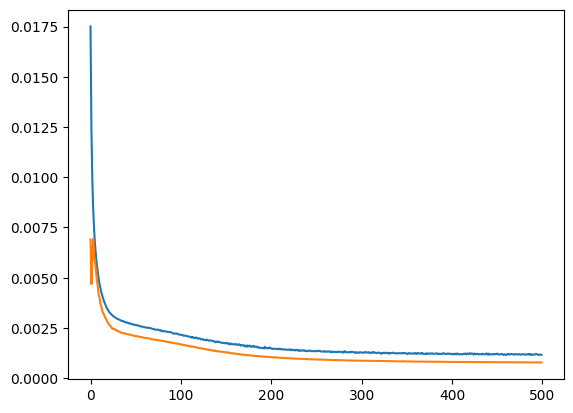

In [7]:
import matplotlib.pyplot as plt
plt.plot(history['loss'])
plt.plot(history['val_loss'])


In [8]:
model.load_state_dict(best_weights)
torch.save(best_weights, '../trained_weights/ResnetSISR_sparse.pt')

/tmp/ipykernel_2009963/3935533979.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t1 = torch.tensor(LR.view(1,1,64,64))


Text(0.5, 1.0, 'Train_Ground truth')

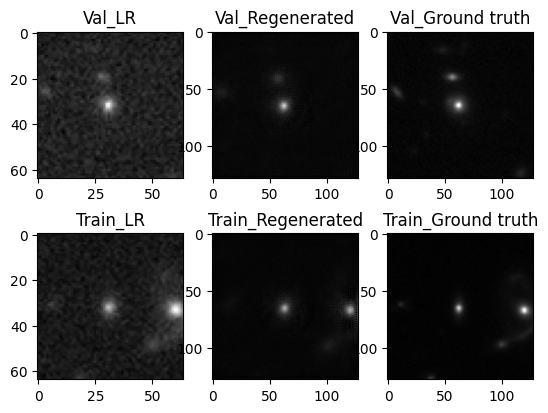

In [9]:
pre, post, tHR = show_random_image(val_dataset, model, 30)
pret, postt, tHRt = show_random_image(train_dataset, model, 270)
plot, axes = plt.subplots(2,3)
axes[0][0].imshow(pre)
axes[0][1].imshow(post)
axes[0][2].imshow(tHR)
axes[0][0].set_title("Val_LR")
axes[0][1].set_title("Val_Regenerated")
axes[0][2].set_title("Val_Ground truth")

axes[1][0].imshow(pret)
axes[1][1].imshow(postt)
axes[1][2].imshow(tHRt)
axes[1][0].set_title("Train_LR")
axes[1][1].set_title("Train_Regenerated")
axes[1][2].set_title("Train_Ground truth")